# MovieLens Exploratory Data Analysis (EDA)

I used the MovieLens dataset for Exploratory Data Analysis. The dataset availble on MovieLens(https://grouplens.org/datasets/movielens/).
It contains 27753444 ratings and 1108997 tag applications across 58098 movies. These data were created by 283228 users between January 09, 1995 and September 26,2018. The dataset was generated on September 26, 2018.

The data are contained in the files genome-scores.csv, genome-tags.csv, links.csv, movies.csv, ratings.csv, and tags.csv. I only use movie.csv and rating.csv.

This Notebook Cover This Questions:

Movie CSV

1. Find the number of released movies for each year
2. Find the number of movies released in last 15 years.
3. Find the number of movies released in different genres last 10 years.
4. Genres in Movies
5. Show Percantage of Genres.
6. Find the 5 years in which the most movies were released and list their genres for each year

Rating CSV

1. Total Number of Per Rating
2. Find the counts of ratings for each year
3. Find the counts of ratings per month
4. Find top 10 users based on counts of ratings. Visualize it.
5. Count of unique users per year
6. Find the 10 Rated Movies and Counts
7. Top 10 Movies by Overall Rating (Sum of Rating/count of rating)
8. Top 10 Movies by Overall Rating (With over 500 ratings count)

## Import Libraries

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

## Movie CSV

In [3]:
movie_df = pd.read_csv("/Users/sajanshergill/Downloads/movies.csv")
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
movie_df.tail()

,movieId,title,genres
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)
62422,209171,Women of Devil's Island (1962),Action|Adventure|Drama


In [5]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
print(f"Shape : {movie_df.shape} \n Size  :  {movie_df.size}")

Shape : (62423, 3) 
 Size  :  187269


In [7]:
movie_df.sample(5)

,movieId,title,genres
24387,121354,Cyrus: Mind of a Serial Killer (2010),Crime|Horror|Mystery|Thriller
2764,2856,I Saw What You Did (1965),Thriller
47458,174593,Dark World (2010),Fantasy|Mystery|Thriller
228,231,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy
8578,26101,McLintock! (1963),Comedy|Western


In [8]:
movie_df.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [9]:
movie_df.nunique()

movieId    62423
title      62325
genres      1639
dtype: int64

In [10]:
movie_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [11]:
movie_df.duplicated().sum()

np.int64(0)

In [12]:
movie_df.index

RangeIndex(start=0, stop=62423, step=1)

In [15]:
def preprocess_movie_csv(movie_df):
    '''
    Extract years by finding 4 consecutive numbers in parentheses, e.g. "Toy Story (1995)".
    Find all unique genres and one-hot encode them.
    '''

    df = movie_df.copy()

    # 1. Extract 4-digit year from the title (inside parentheses)
    df['release_year'] = df['title'].str.extract(r"\((\d{4})\)", expand=False)

    # 2. Remove the year part from the title, e.g. "Toy Story (1995)" -> "Toy Story"
    df['title'] = df['title'].str.replace(r"\s*\(\d{4}\)\s*$", "", regex=True)

    # 3. One-hot encode genres (assuming pipe-separated like "Action|Drama")
    df = df.join(df['genres'].str.get_dummies(sep='|').astype(bool))

    # 4. Drop original genres column
    df.drop('genres', axis=1, inplace=True)

    return df

# Use the function
processed_movie_df = preprocess_movie_csv(movie_df)

# Rename the no-genre column if it exists
processed_movie_df.rename(columns={"(no genres listed)": "No Genre"}, inplace=True)

processed_movie_df


,movieId,title,release_year,No Genre,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,False,False,True,True,True,True,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji,1995,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,Waiting to Exhale,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,Father of the Bride Part II,1995,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62418,209157,We,2018,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62419,209159,Window of the Soul,2001,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
62420,209163,Bad Poems,2018,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
62421,209169,A Girl Thing,2001,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
df_movie_titles = processed_movie_df[['movieId', 'title']]
df_movie_titles

,movieId,title
0,1,Toy Story
1,2,Jumanji
2,3,Grumpier Old Men
3,4,Waiting to Exhale
4,5,Father of the Bride Part II
...,...,...
62418,209157,We
62419,209159,Window of the Soul
62420,209163,Bad Poems
62421,209169,A Girl Thing


### 1. Find the number of released movies for each year

In [20]:
years = np.sort(pd.to_numeric(processed_movie_df['release_year'], errors='coerce').dropna().astype(int).unique())
years.sort()
print(years)

[1874 1878 1880 1883 1887 1888 1890 1891 1892 1894 1895 1896 1897 1898
 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912
 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926
 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954
 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968
 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982
 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996
 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010
 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [21]:
df_temp = processed_movie_df.groupby(['release_year'])['title'].count()
df_temp.plot.bar(x='year', y='movies', title ='Number of movies released per year', figsize=(30,5))

<Axes: title={'center': 'Number of movies released per year'}, xlabel='release_year'>

### 2. Find the number of movies released in last 15 years

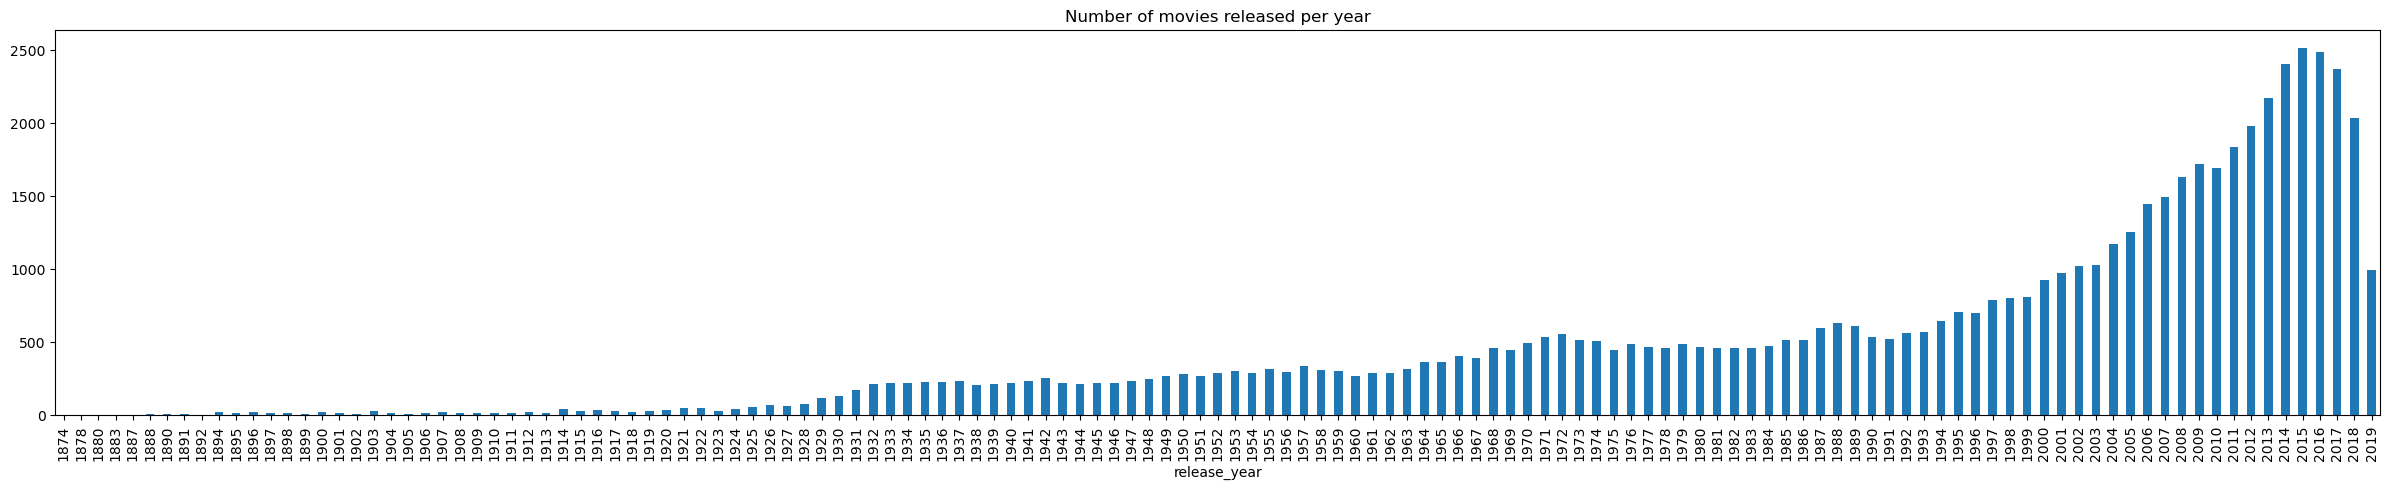

<Figure size 2500x800 with 0 Axes>

<Figure size 2500x800 with 0 Axes>

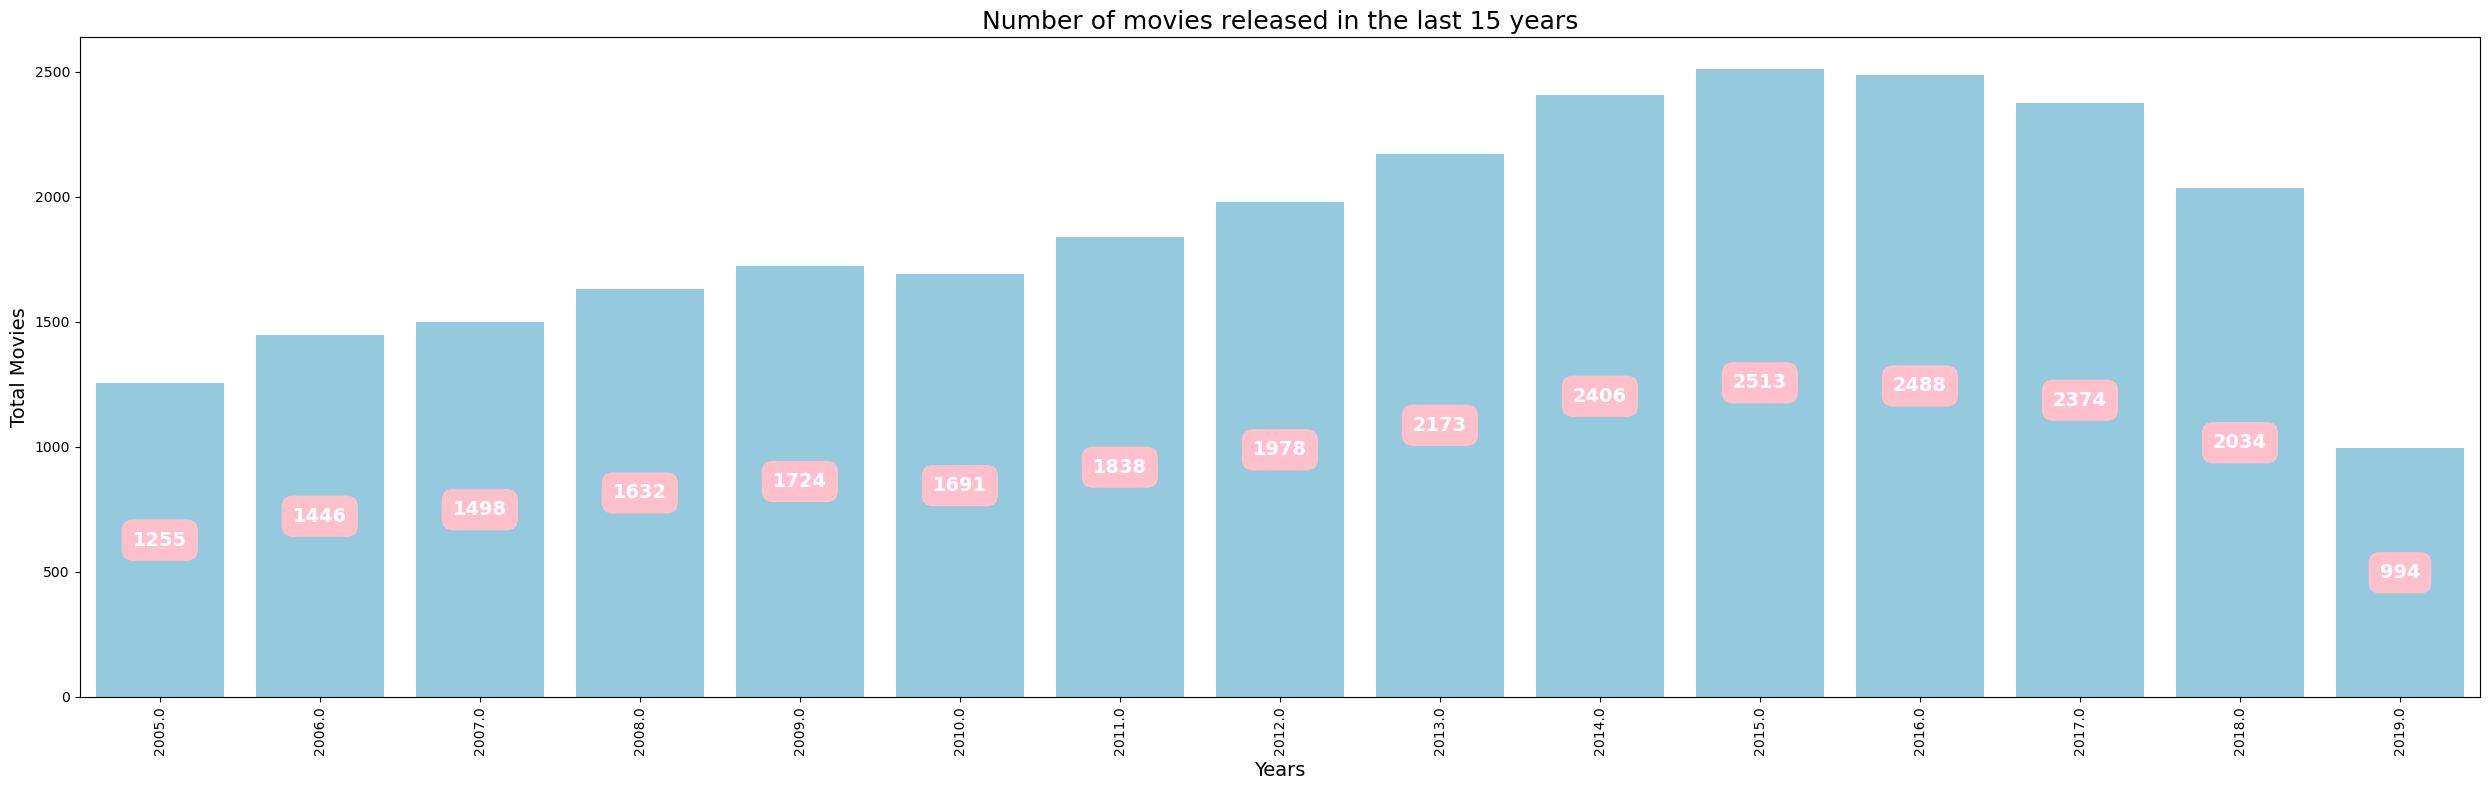

In [24]:

# Make sure release_year is numeric
processed_movie_df['release_year'] = pd.to_numeric(
    processed_movie_df['release_year'], errors='coerce'
)

# Group by year, count titles, sort by year, take last 15 years
df_temp = (
    processed_movie_df
    .groupby('release_year')['title']
    .count()
    .sort_index()
    .tail(15)
    .reset_index(name='movie_count')
)

plt.figure(figsize=(25, 8))

# Use df_temp as data, not processed_movie_df
ax = sns.barplot(
    data=df_temp,
    x='release_year',
    y='movie_count',
    color='skyblue'  # or palette='rainbow' with hue if you like
)

# Add labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2,
        height/2,
        int(height),
        ha='center', va='center',
        size=14, weight='bold', color='white',
        bbox=dict(boxstyle="round, pad=0.5", fc='pink', ec='pink', lw=2)
    )

plt.xlabel('Years', fontsize=14)
plt.ylabel('Total Movies', fontsize=14)
plt.xticks(rotation=90)
plt.title("Number of movies released in the last 15 years", fontsize=18)
plt.tight_layout()
plt.show()


### 3. Find the number of movies released in different genres last 10 years

In [26]:
genres_unique = pd.DataFrame(pd.DataFrame(movie_df.genres.str.split('|').tolist()).stack().unique(), columns=['genre'])
genres_unique[-1:] = "No Genre"
genres_unique

,genre
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy
5,Romance
6,Drama
7,Action
8,Crime
9,Thriller


/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/3609823652.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_temp['release_year'].fillna(int(df_temp['release_year'].mean()), inplace=True)
/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/3609823652.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

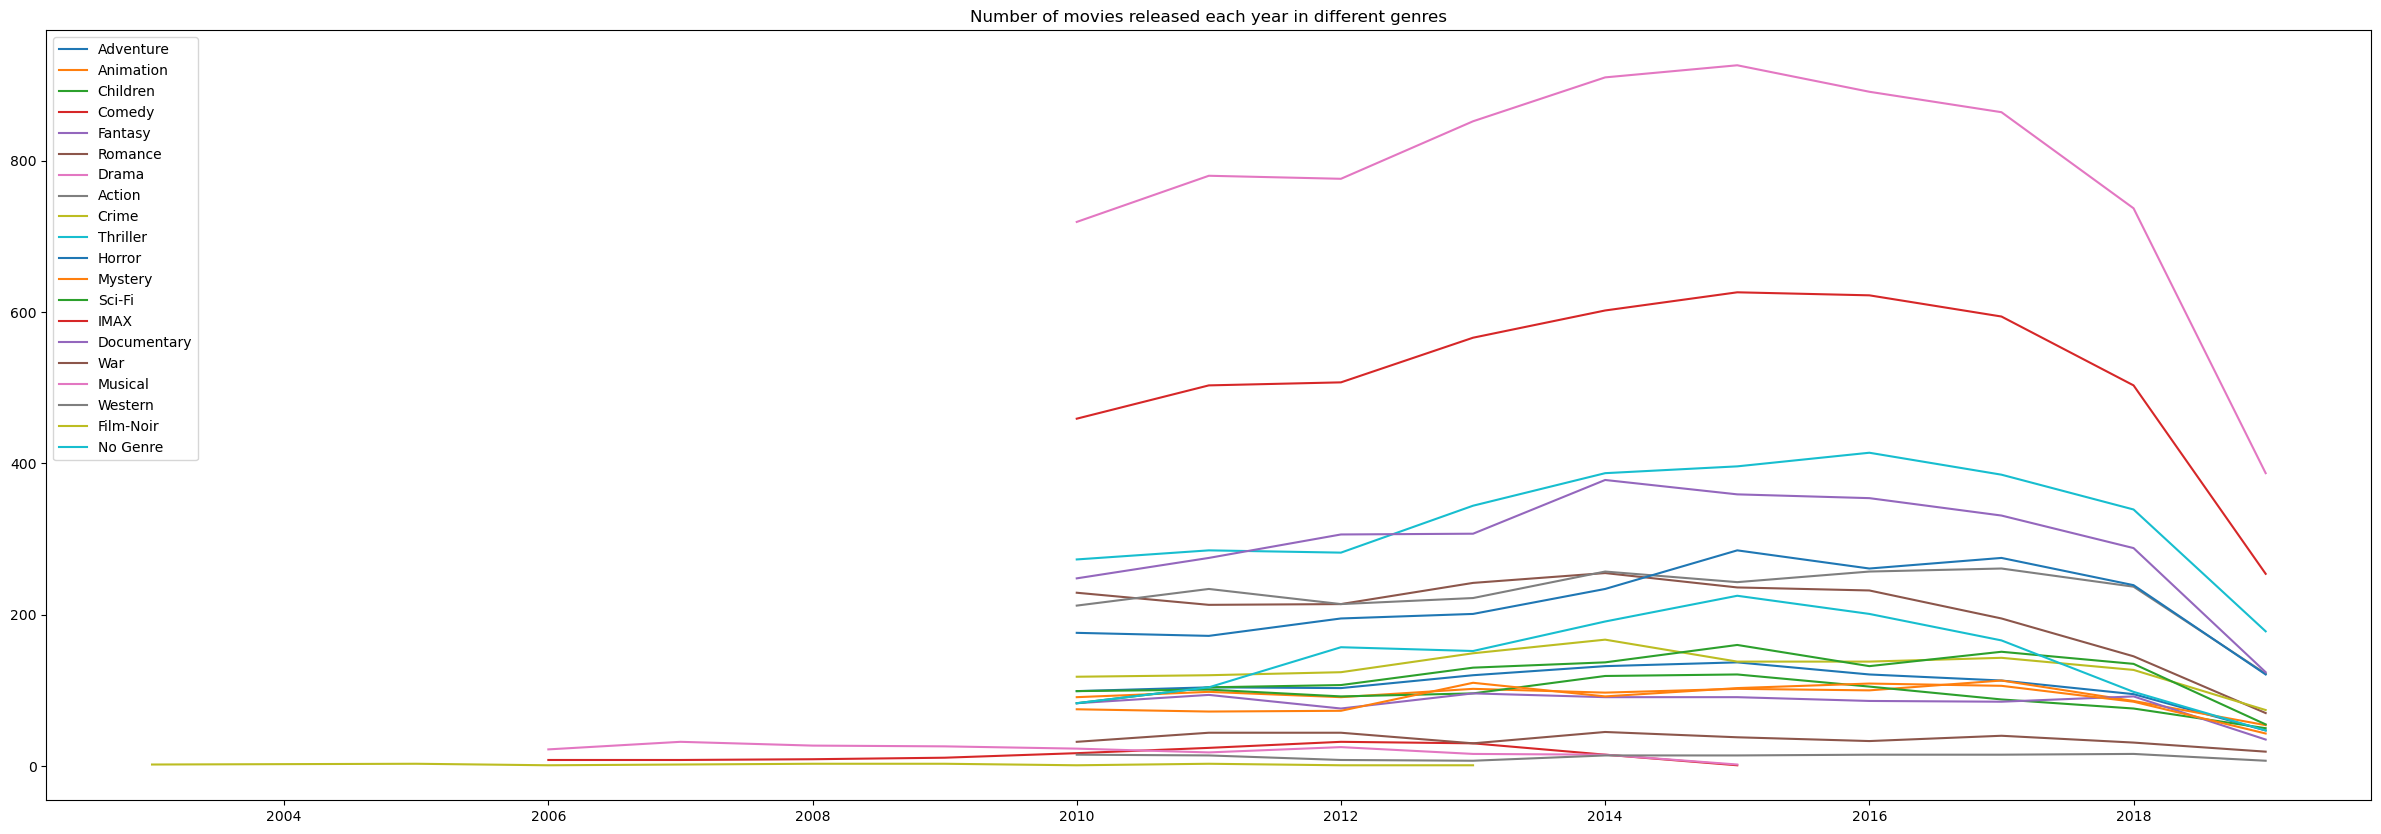

In [27]:
plt.figure(figsize=(30, 10))
for genre in genres_unique.genre:
    df_temp = processed_movie_df[processed_movie_df[genre]==True][['release_year','movieId']]

    #fill na with mean of the years
    df_temp['release_year']= pd.to_numeric(df_temp['release_year'], errors='coerce')
    df_temp['release_year'].fillna(int(df_temp['release_year'].mean()), inplace=True)
    df_temp['release_year'] = df_temp['release_year'].astype(int)
    df_temp = df_temp.groupby(['release_year']).count().reset_index().tail(10)
    plt.plot(df_temp['release_year'], df_temp['movieId'], label=genre)
plt.title('Number of movies released each year in different genres')
plt.legend()
plt.show()

### 4. Genres in Movies

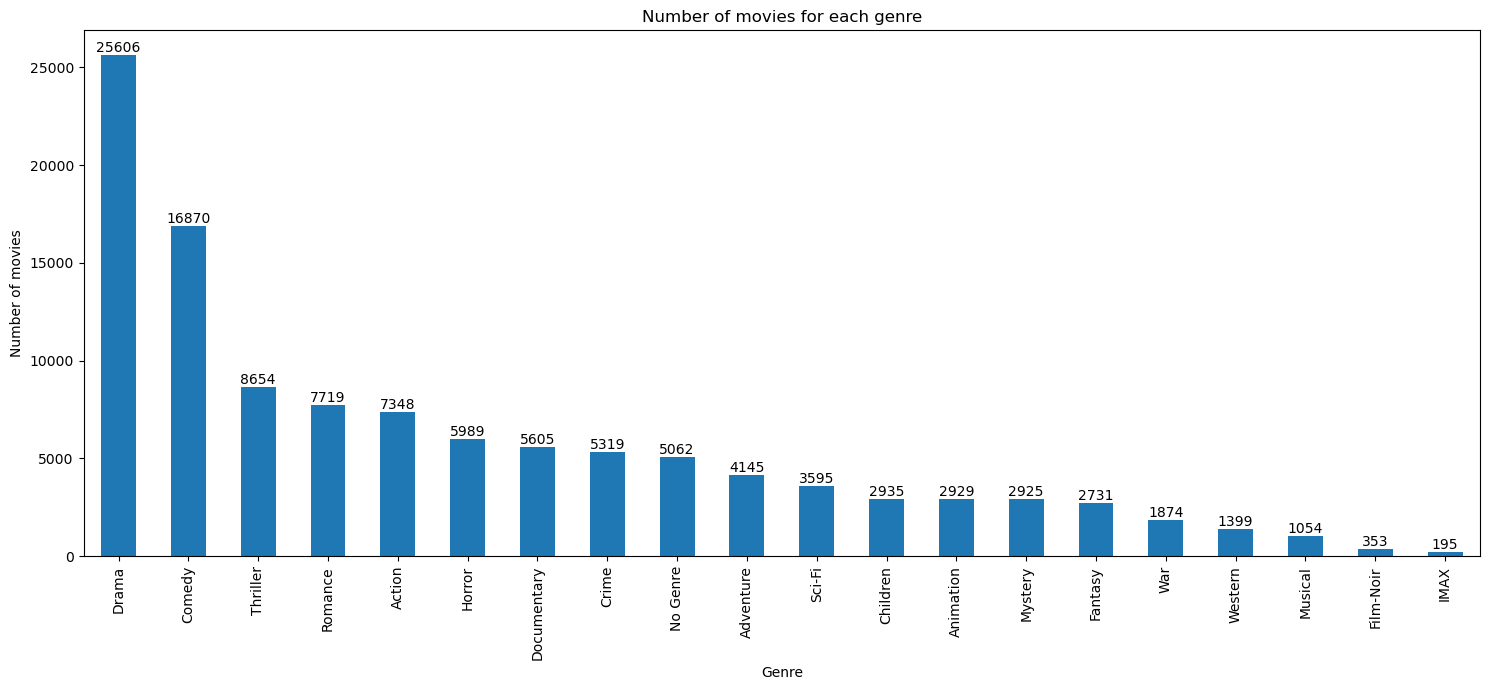

In [29]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique['genre']:
    # assuming each genre is a boolean column in processed_movie_df
    num_movies = processed_movie_df[genre].sum()
    row = [genre, num_movies]
    df_genres.loc[len(df_genres)] = row

df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)

df_genres = (
    df_genres
    .sort_values('num_movies', ascending=False)
    .set_index('genre')
)

# Plot
plt.figure(figsize=(15, 7))
ax = df_genres['num_movies'].plot(kind='bar')

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width()/2, p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

ax.set_title('Number of movies for each genre')
ax.set_xlabel('Genre')
ax.set_ylabel('Number of movies')

plt.tight_layout()
plt.show()

### 5. Show Percentage of Genres

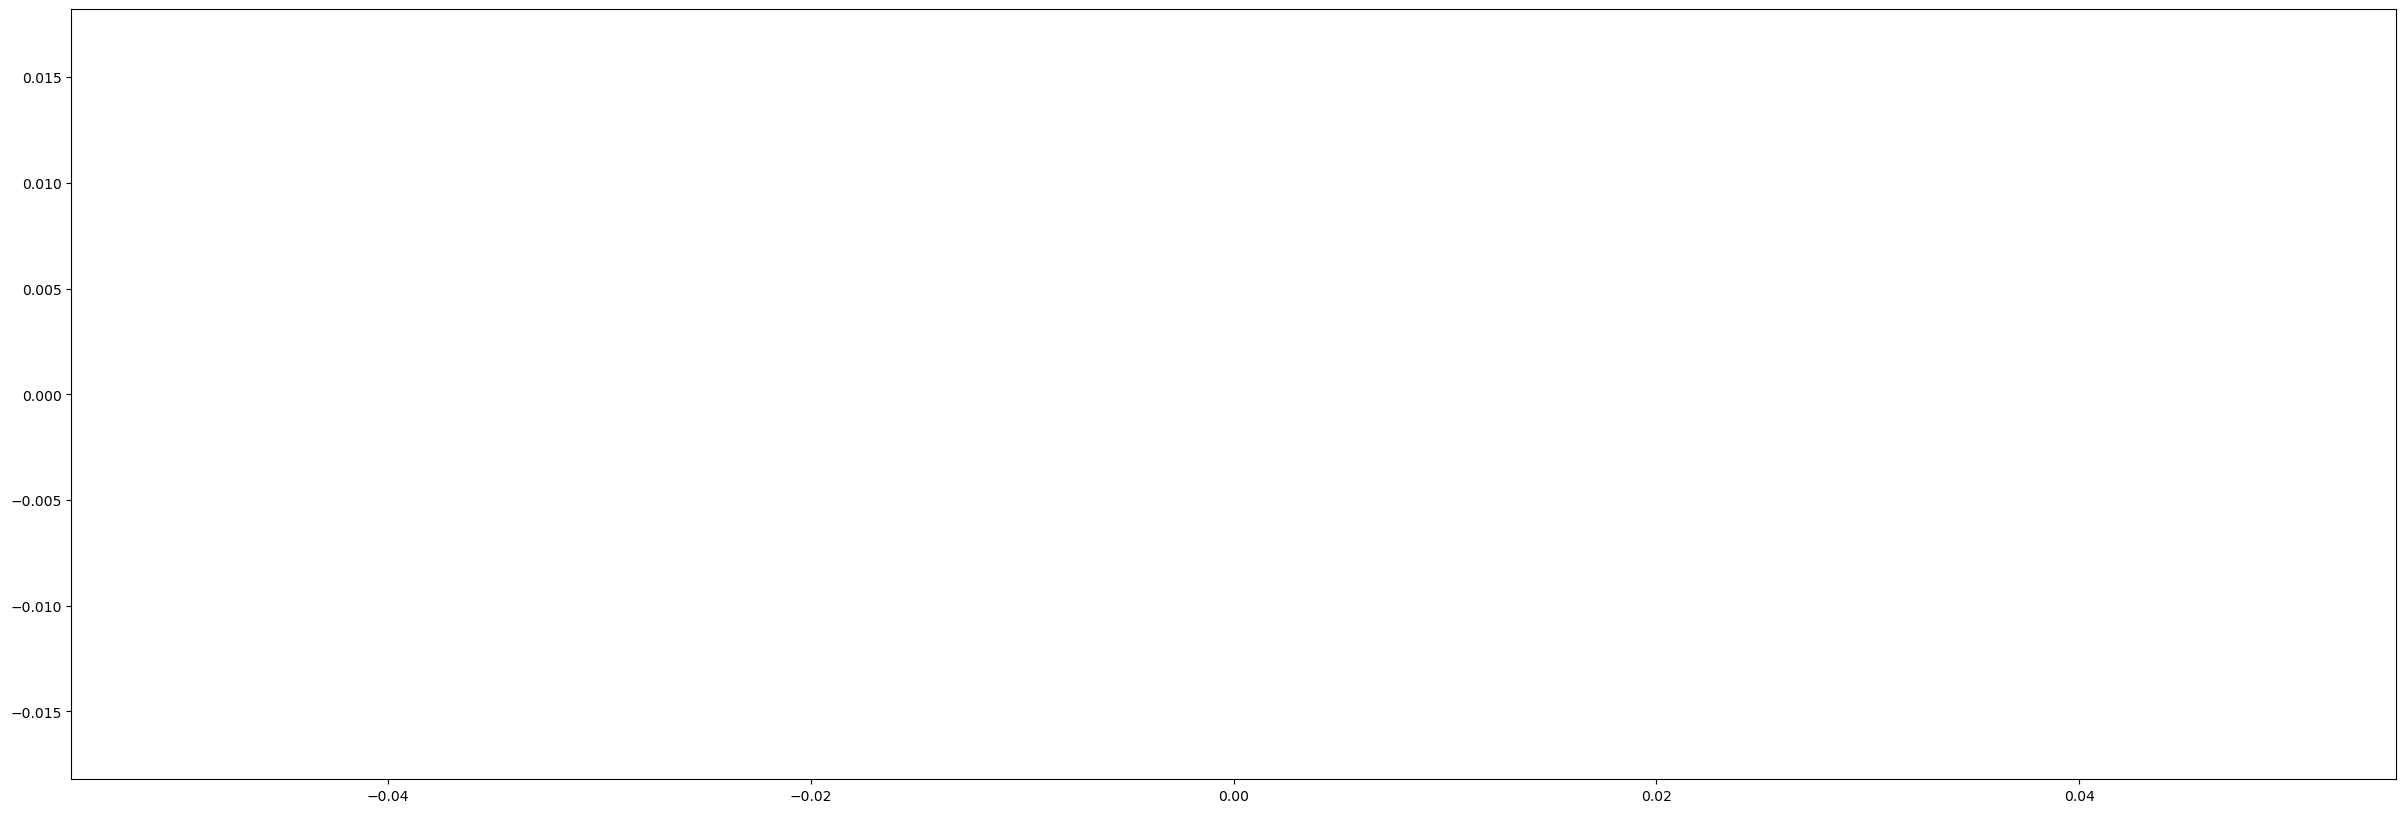

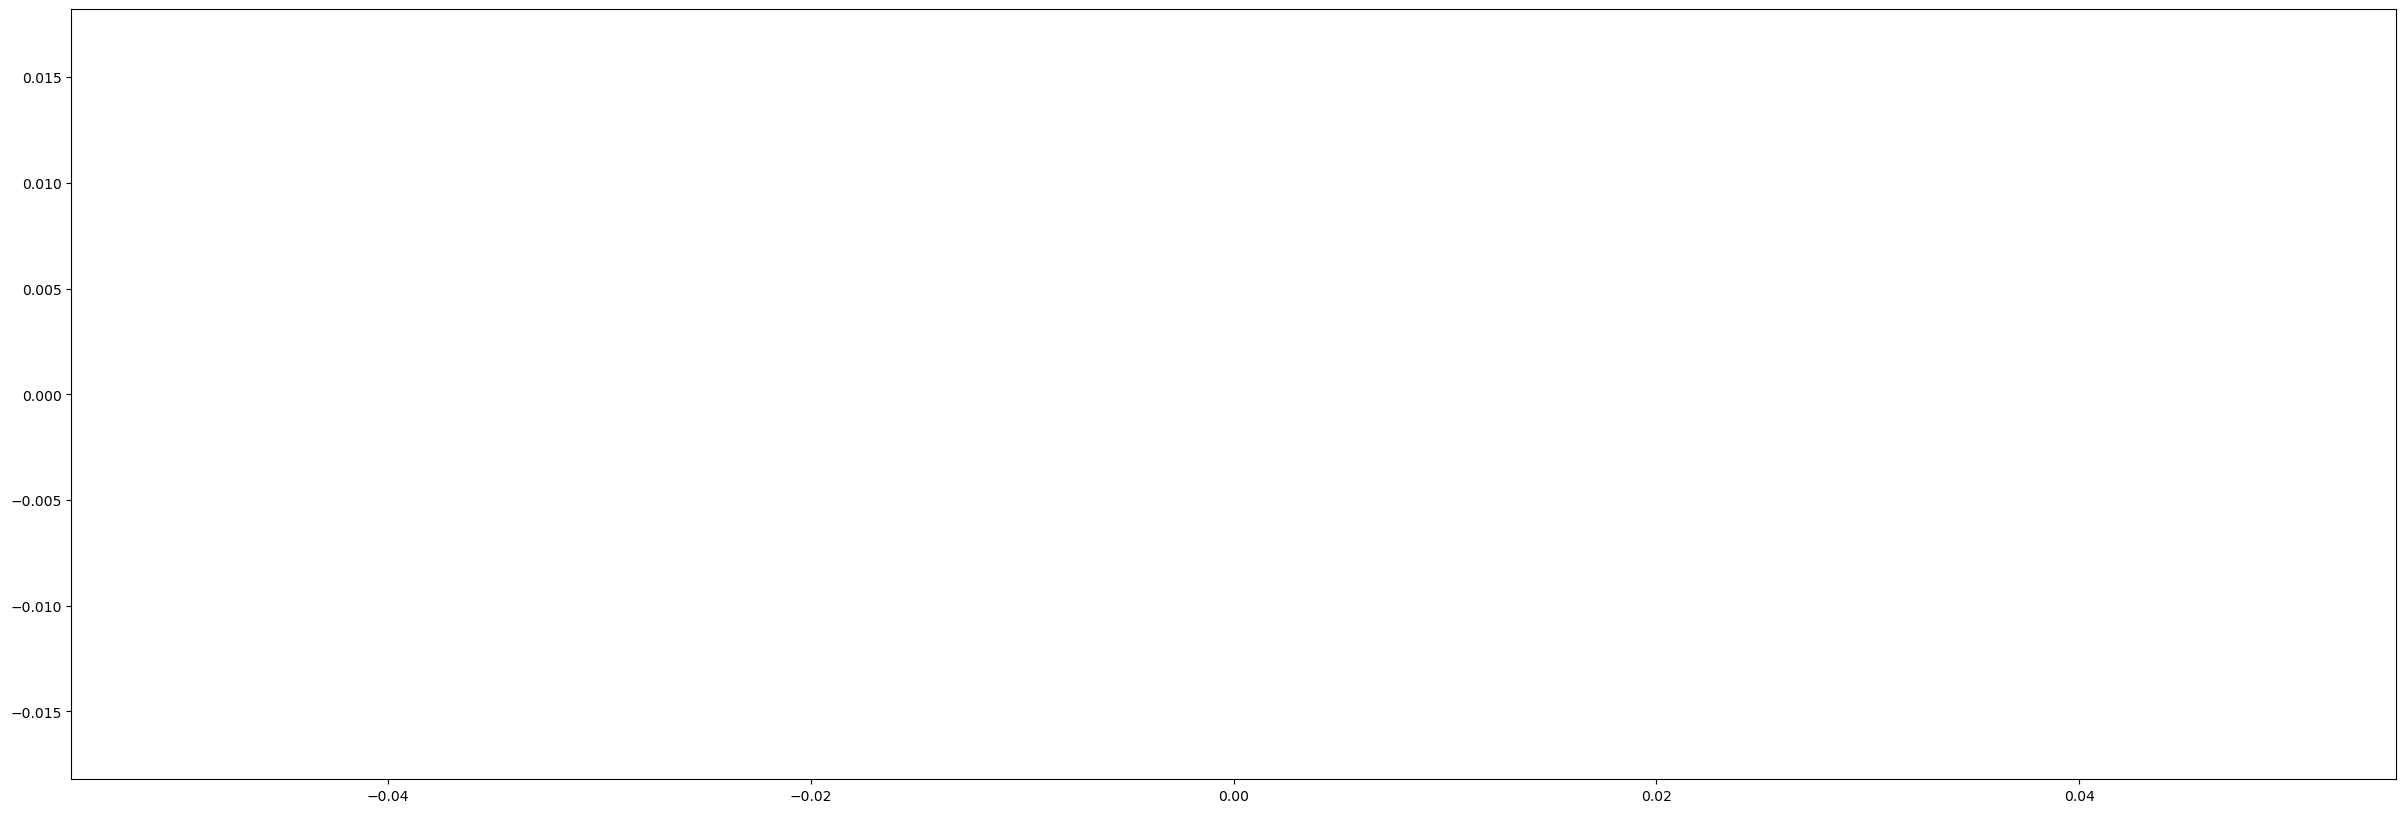

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


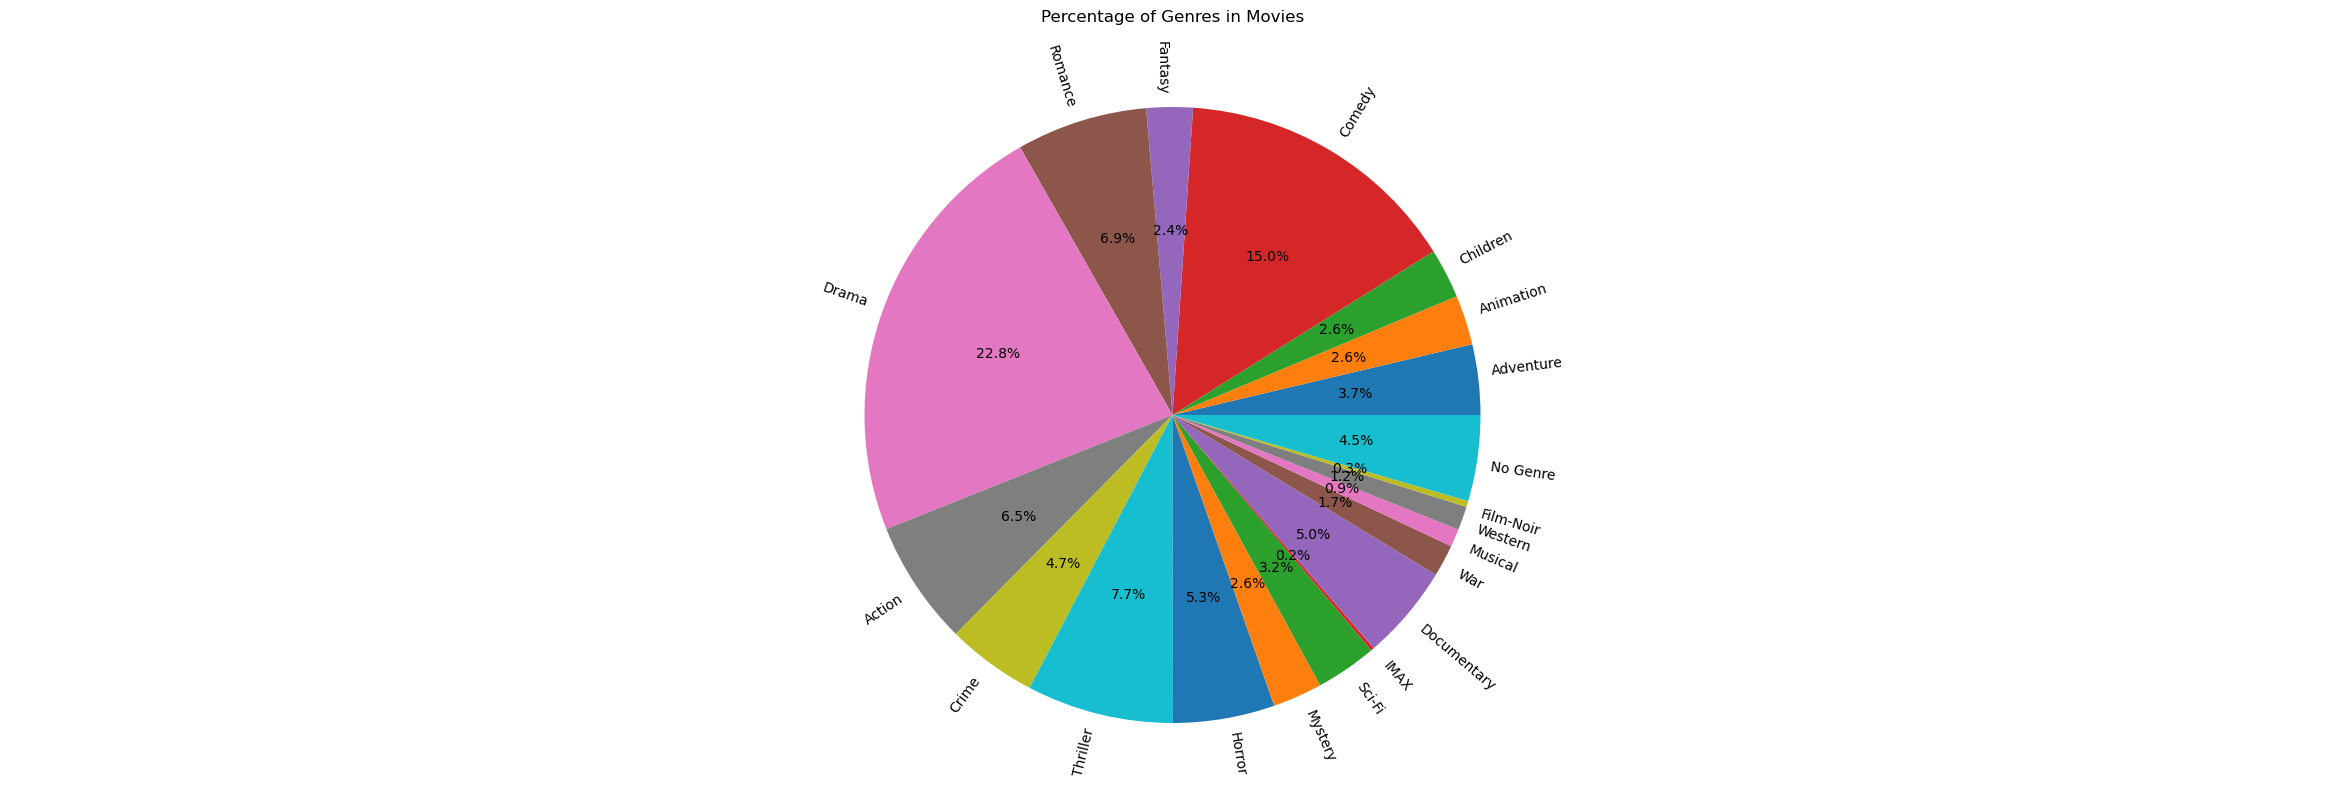

In [32]:
df_genres = pd.DataFrame(columns=['genre', 'num_movies'])

for genre in genres_unique['genre']:
    num_movies = processed_movie_df[genre].sum()   # count True values
    df_genres.loc[len(df_genres)] = [genre, num_movies]

plt.figure(figsize=(30,10))
plt.axis('equal')

plt.pie(
    df_genres['num_movies'],
    labels=df_genres['genre'],     # <-- fixed: labels
    autopct='%.1f%%',
    labeldistance=1.04,
    rotatelabels=True
)

plt.title("Percentage of Genres in Movies")
plt.show()


### 6. Find the 5 years in which the most movies were released and list their genres for each year

In [34]:
df_temp = (
    processed_movie_df
        .groupby('release_year')['title']
        .count()
        .nlargest(5)
)

print(df_temp.index.values)


[2015. 2016. 2014. 2017. 2013.]


In [36]:
top_years = processed_movie_df[processed_movie_df["release_year"].isin(df_temp.index)].sort_values(by='release_year', ascending=False).reset_index()
top_years[top_years['release_year'].astype(int)==2014]

,index,movieId,title,release_year,No Genre,Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7375,52366,185125,A los 40,2014.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7376,49906,179867,Live-In Fear,2014.0,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7377,51658,183615,Boys Like Us,2014.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7378,52380,185155,Viejos amigos,2014.0,False,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
7379,48005,175769,Geronimo,2014.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9776,47130,173865,That Thing Called Tadhana,2014.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
9777,21289,109864,Veronica Mars,2014.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9778,35913,148968,Encounters,2014.0,False,False,False,False,False,False,...,False,True,False,False,True,False,True,False,False,False
9779,36166,149594,A Matter of Faith,2014.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
df_genres = pd.DataFrame(columns=['year', 'genre', 'num_movies'])

for i in range(len(df_temp)):
    year_val = int(df_temp.index[i])

    df_year = top_years[top_years['release_year'].astype(int) == year_val]

    for genre in genres_unique.genre:
        num_movies = int(df_year[genre].sum())   # <-- scalar, no warning
        df_genres.loc[len(df_genres)] = [year_val, genre, num_movies]

df_genres['year'] = df_genres['year'].astype(np.int32)
df_genres['num_movies'] = df_genres['num_movies'].astype(np.int32)

df_genres = df_genres.sort_values('num_movies', ascending=False)


In [38]:
df_genres=df_genres.sort_values(by=['year'])

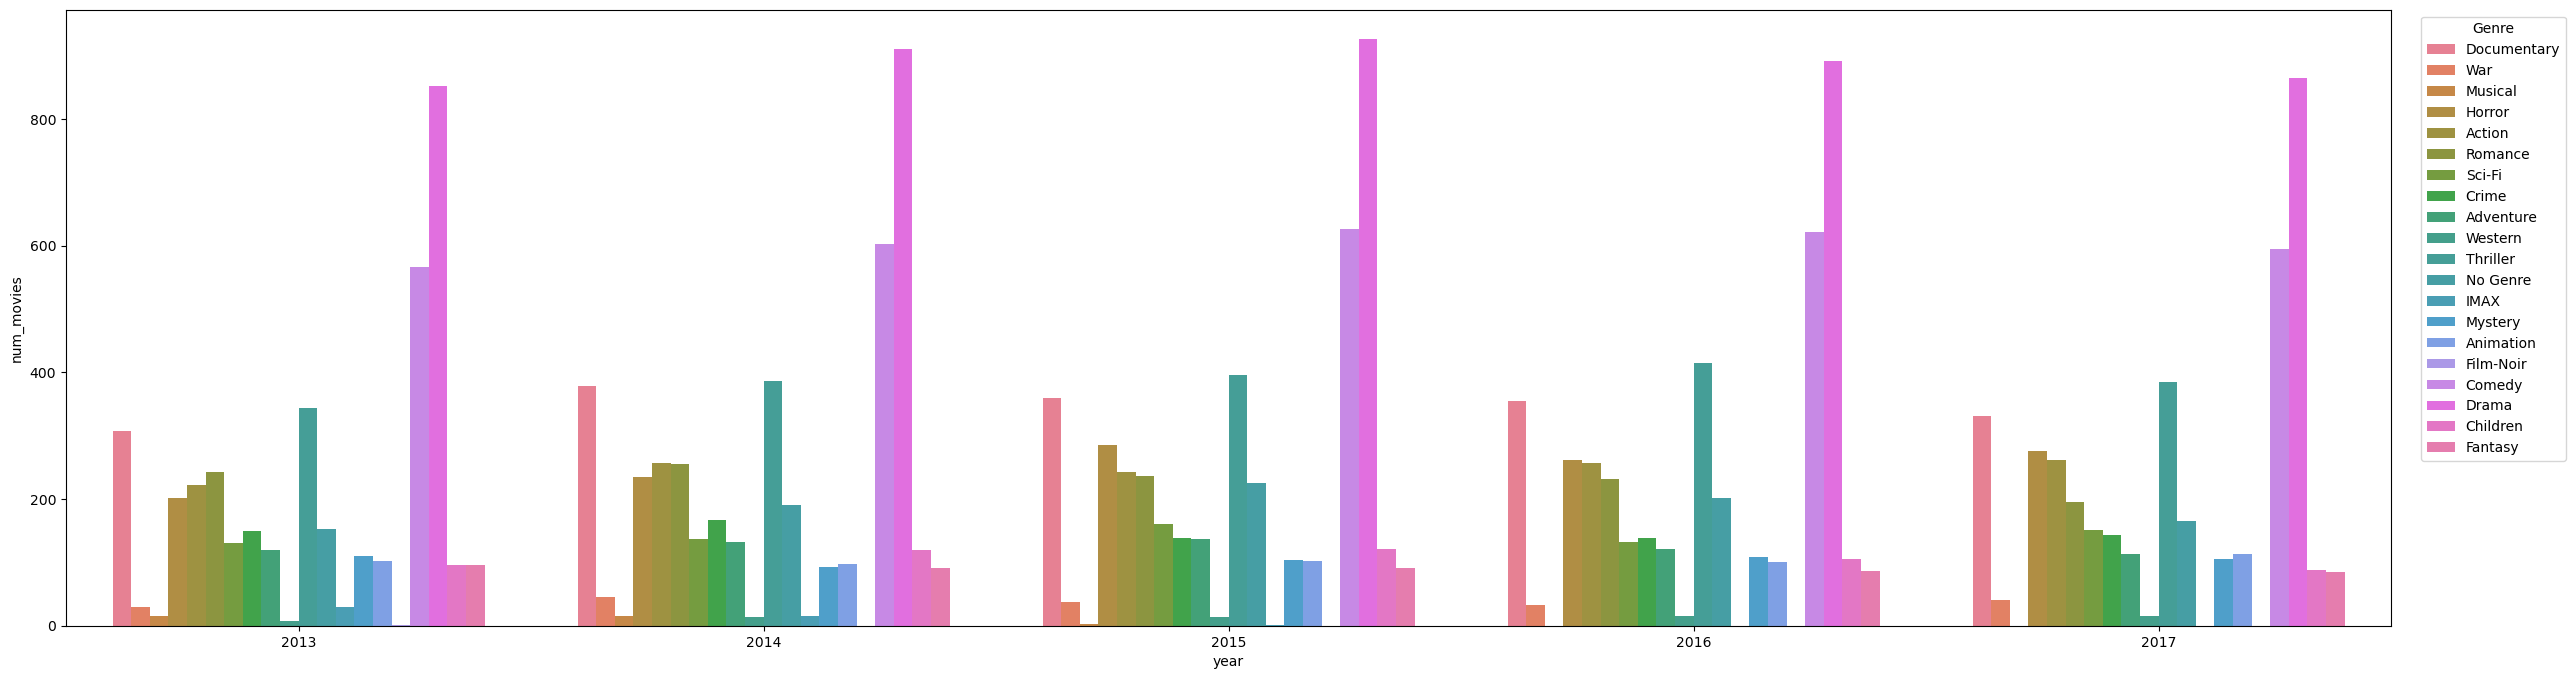

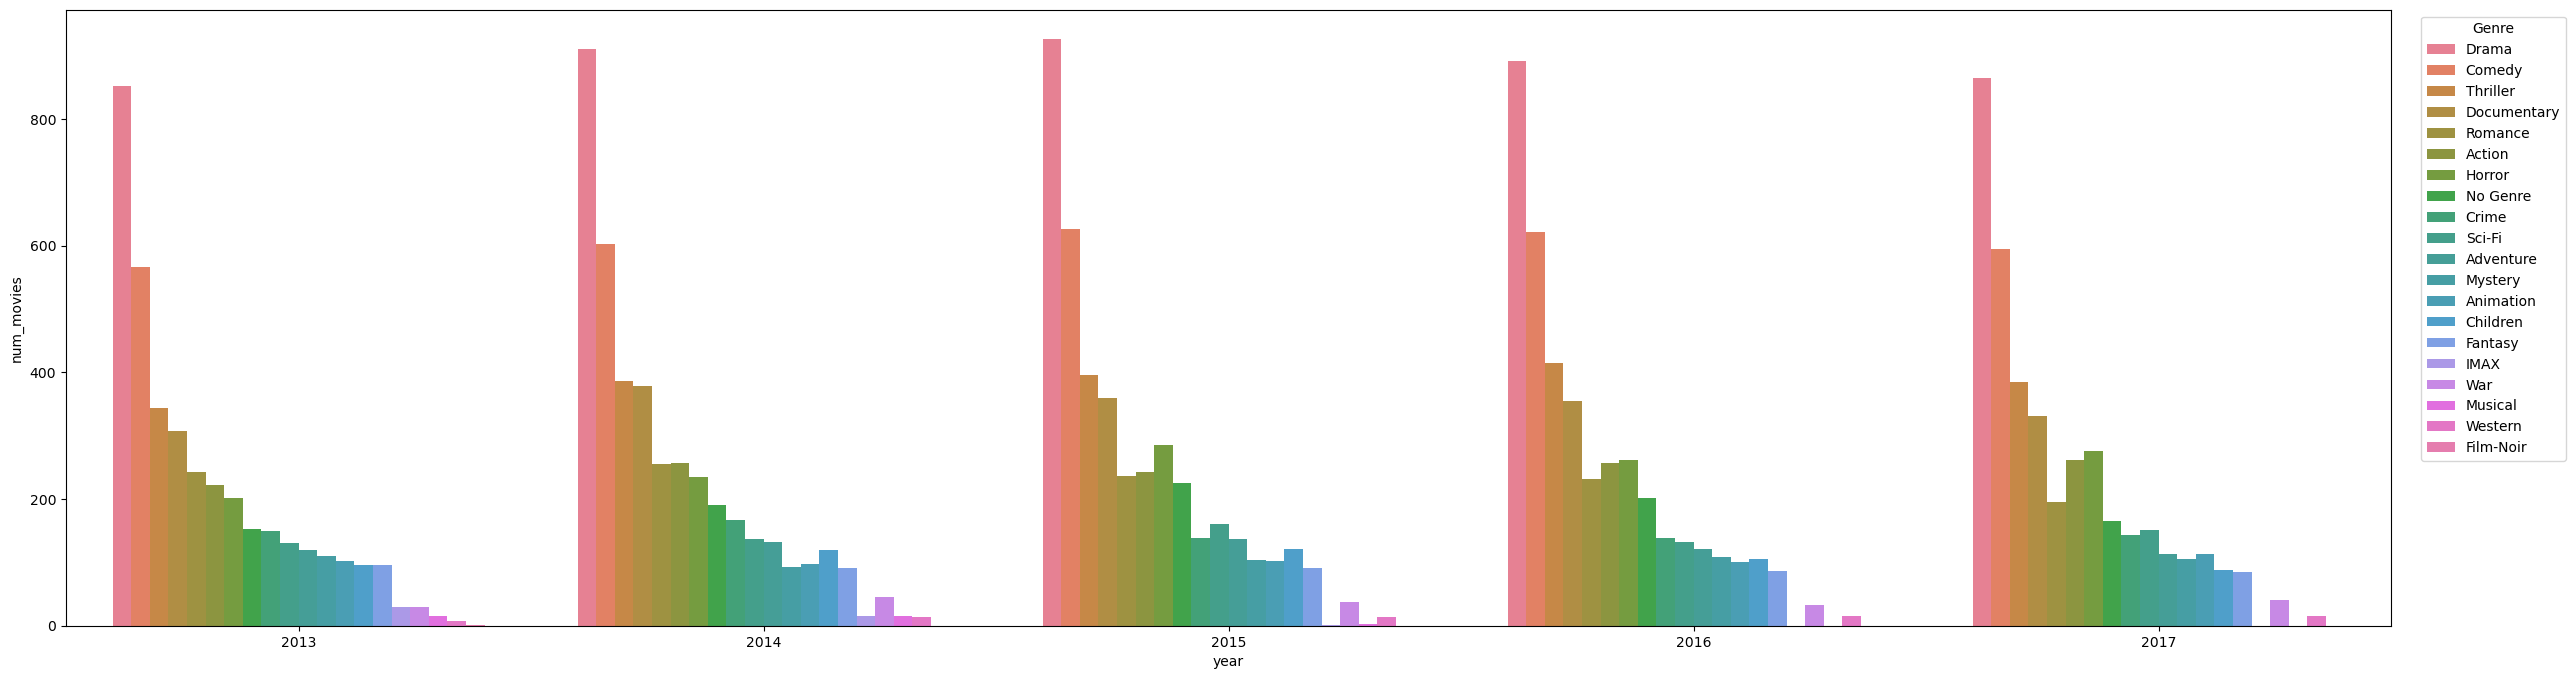

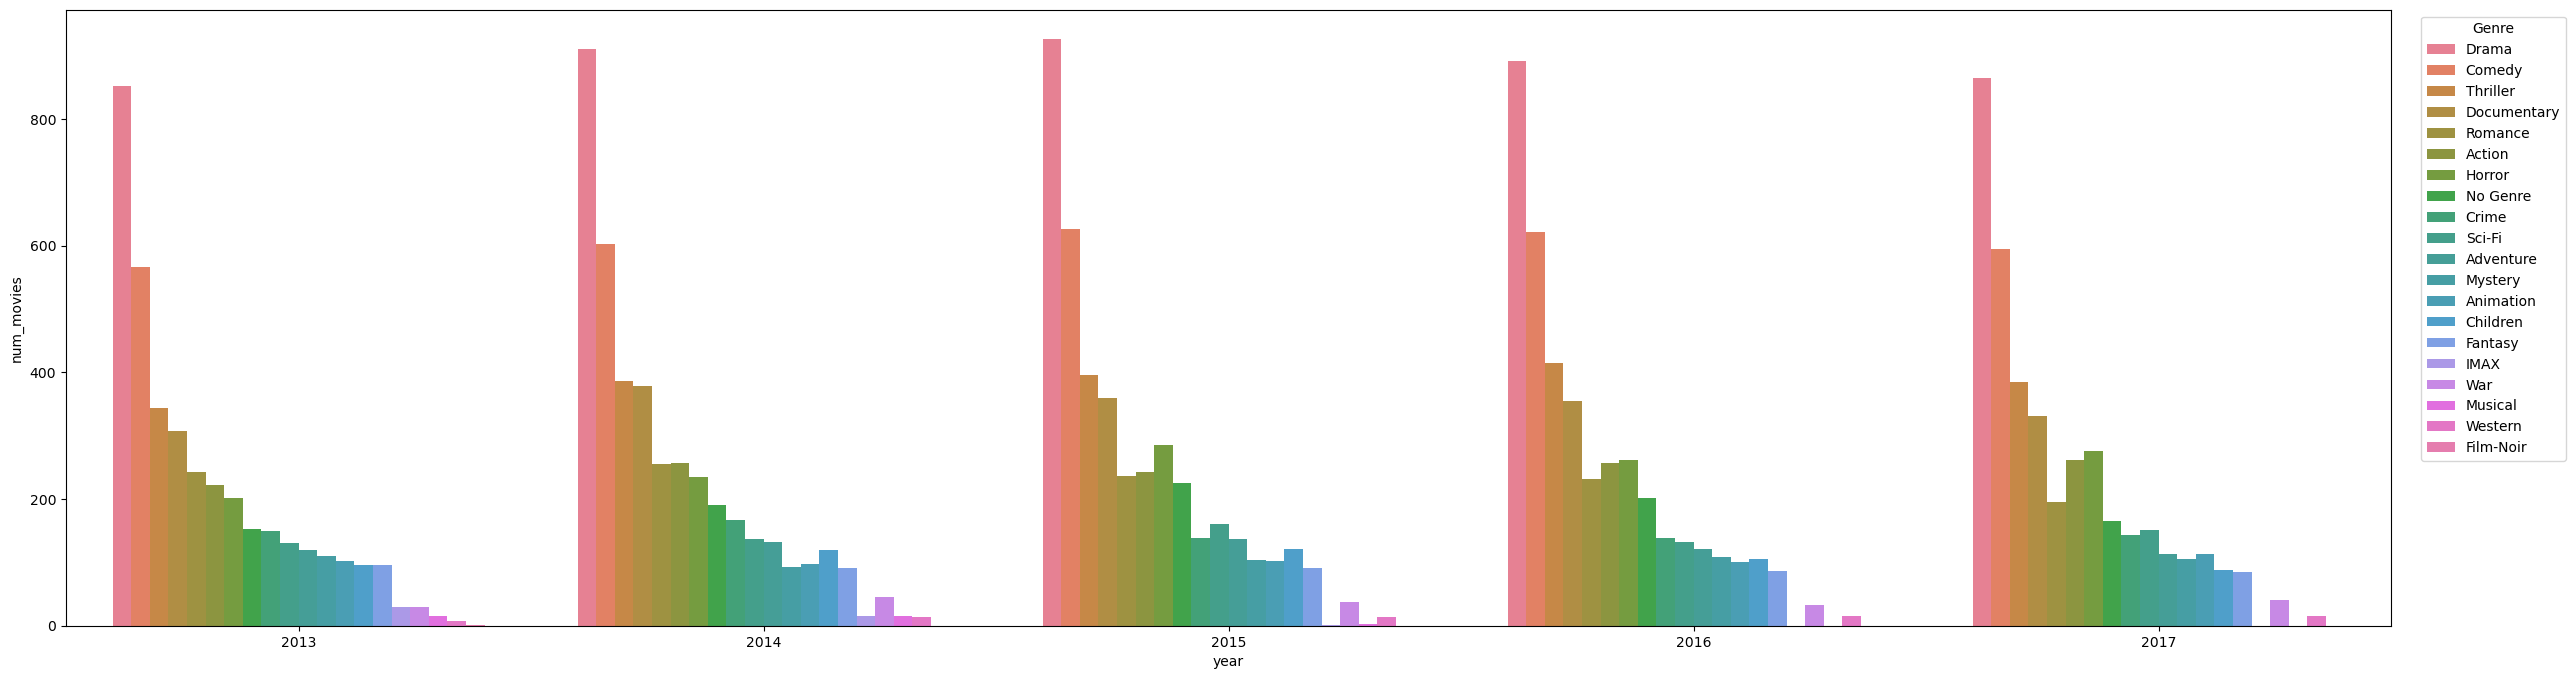

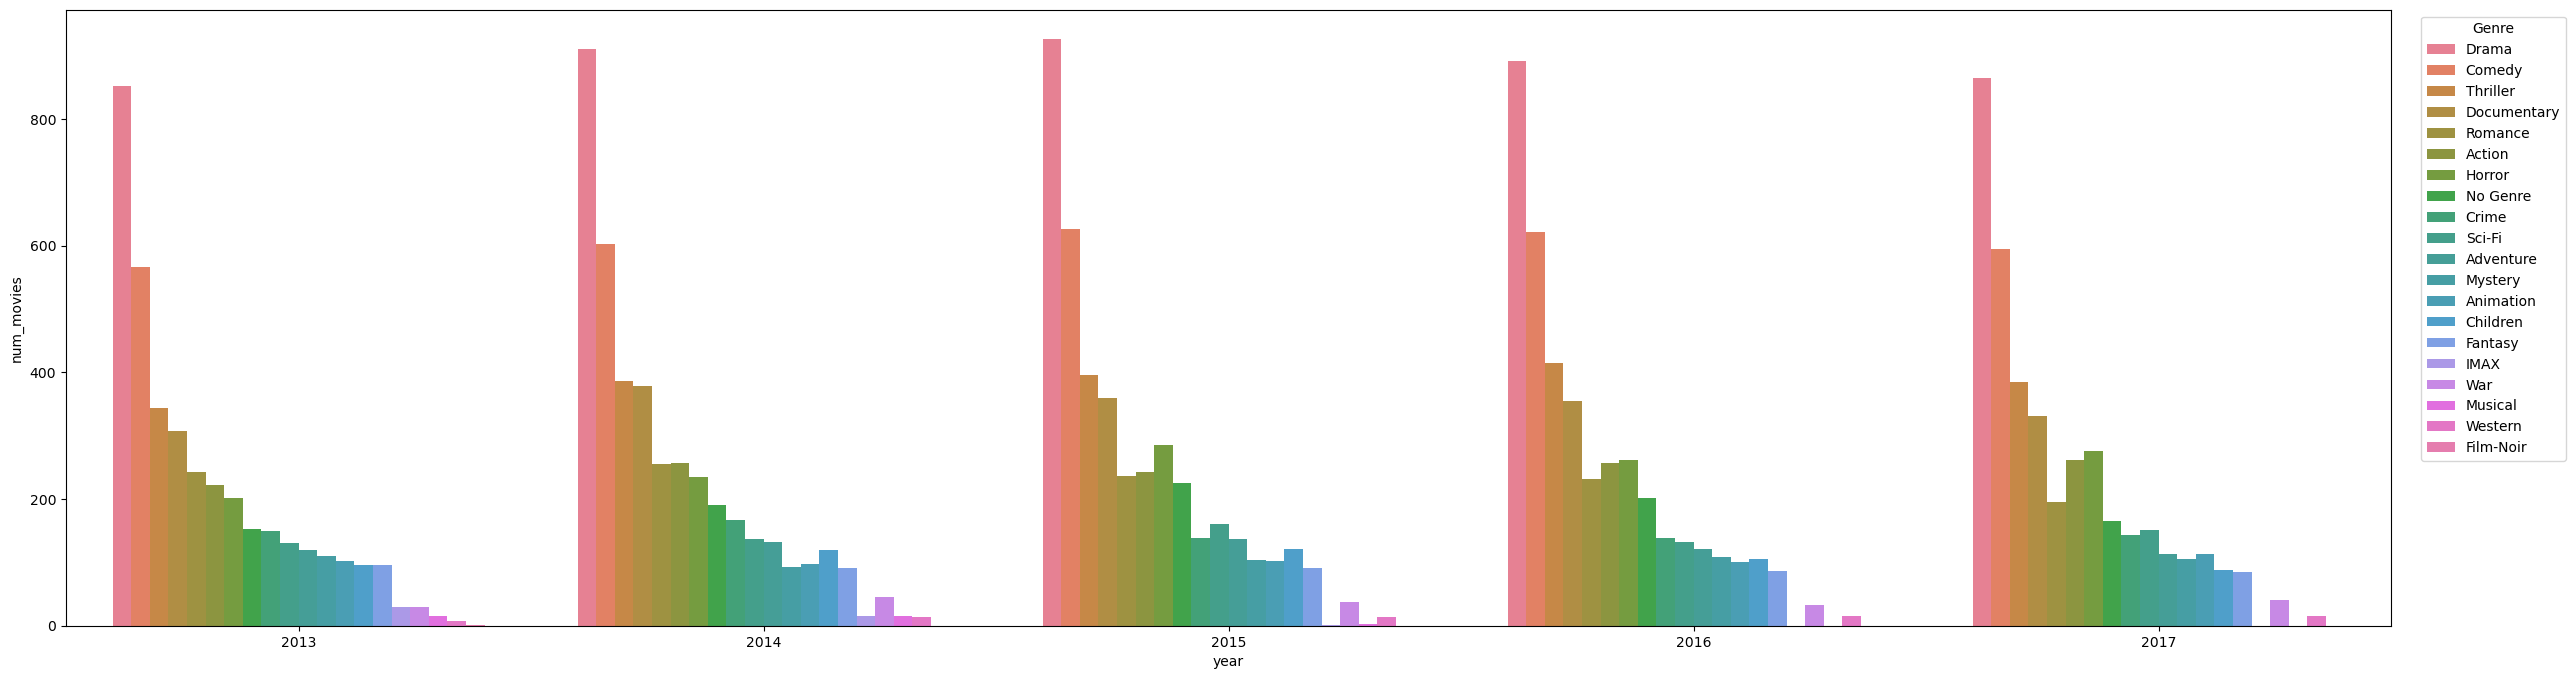

In [43]:
plt.figure(figsize=(30,8))

ax = sns.barplot(
    x=df_genres['year'],
    y=df_genres["num_movies"],
    hue=df_genres["genre"],
    err_kws={'linewidth': 0}
)

# Optional if you want values on bars
# for c in ax.containers:
#     ax.bar_label(c)

plt.legend(title='Genre', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()


### Rating CSV

In [44]:
df_rating = pd.read_csv("/Users/sajanshergill/Downloads/ratings.csv")

In [45]:
df_rating.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [46]:
df_rating.tail()

,userId,movieId,rating,timestamp
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434
25000094,162541,63876,5.0,1240952515


In [47]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB


In [49]:
print(f"Shape : {df_rating.shape} \nSize : {df_rating.size}")

Shape : (25000095, 4) 
Size : 100000380


In [50]:
df_rating.sample(5)

,userId,movieId,rating,timestamp
13286184,85977,1597,2.0,941449387
10813178,70169,1357,5.0,1091054643
13764932,89215,381,3.0,850916930
3134676,20664,4027,1.5,1347748656
6015417,38972,51662,5.0,1270691454


In [51]:
df_rating.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [53]:
df_rating.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [54]:
df_rating.duplicated().sum()

np.int64(0)

In [55]:
df_rating["timestamp"] = df_rating["timestamp"].apply(datetime.fromtimestamp)
df_rating['year'] = df_rating['timestamp'].dt.year
df_rating['month'] = df_rating['timestamp'].dt.month
df_rating['time'] = df_rating['timestamp'].dt.time
df_rating['date'] = df_rating['timestamp'].dt.date

In [56]:
df_rating

,userId,movieId,rating,timestamp,year,month,time,date
0,1,296,5.0,2006-05-17 11:34:04,2006,5,11:34:04,2006-05-17
1,1,306,3.5,2006-05-17 08:26:57,2006,5,08:26:57,2006-05-17
2,1,307,5.0,2006-05-17 08:27:08,2006,5,08:27:08,2006-05-17
3,1,665,5.0,2006-05-17 11:13:40,2006,5,11:13:40,2006-05-17
4,1,899,3.5,2006-05-17 08:21:50,2006,5,08:21:50,2006-05-17
...,...,...,...,...,...,...,...,...
25000090,162541,50872,4.5,2009-04-28 17:16:12,2009,4,17:16:12,2009-04-28
25000091,162541,55768,2.5,2009-04-28 16:53:18,2009,4,16:53:18,2009-04-28
25000092,162541,56176,2.0,2009-04-28 16:31:37,2009,4,16:31:37,2009-04-28
25000093,162541,58559,4.0,2009-04-28 17:17:14,2009,4,17:17:14,2009-04-28


In [57]:
print('Years:                      ', df_rating.year.unique())
print('Months:                     ', df_rating.month.unique())
print('Unique ratings :            ', df_rating.rating.unique())
print('Average rating :            ', round(df_rating.rating.mean(), 2))
print('Frequency of each rating value:\n', df_rating['rating'].value_counts())

Years:                       [2006 2015 2017 2016 2019 1997 1996 1999 1998 2008 2000 2005 2009 2001
 2003 2007 2002 2010 2004 2011 2013 2012 2014 2018 1995]
Months:                      [ 5  3  8  1  4 11  6 12  9 10  7  2]
Unique ratings :             [5.  3.5 4.  2.5 4.5 3.  0.5 2.  1.  1.5]
Average rating :             3.53
Frequency of each rating value:
 rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64


In [58]:
df = df_rating.sort_values('movieId')

In [60]:
df_ratings = df.merge(df_movie_titles, left_on='movieId', right_on='movieId', how='left')

### 1. Total Number of Per Rating

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/245918411.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ylabels)


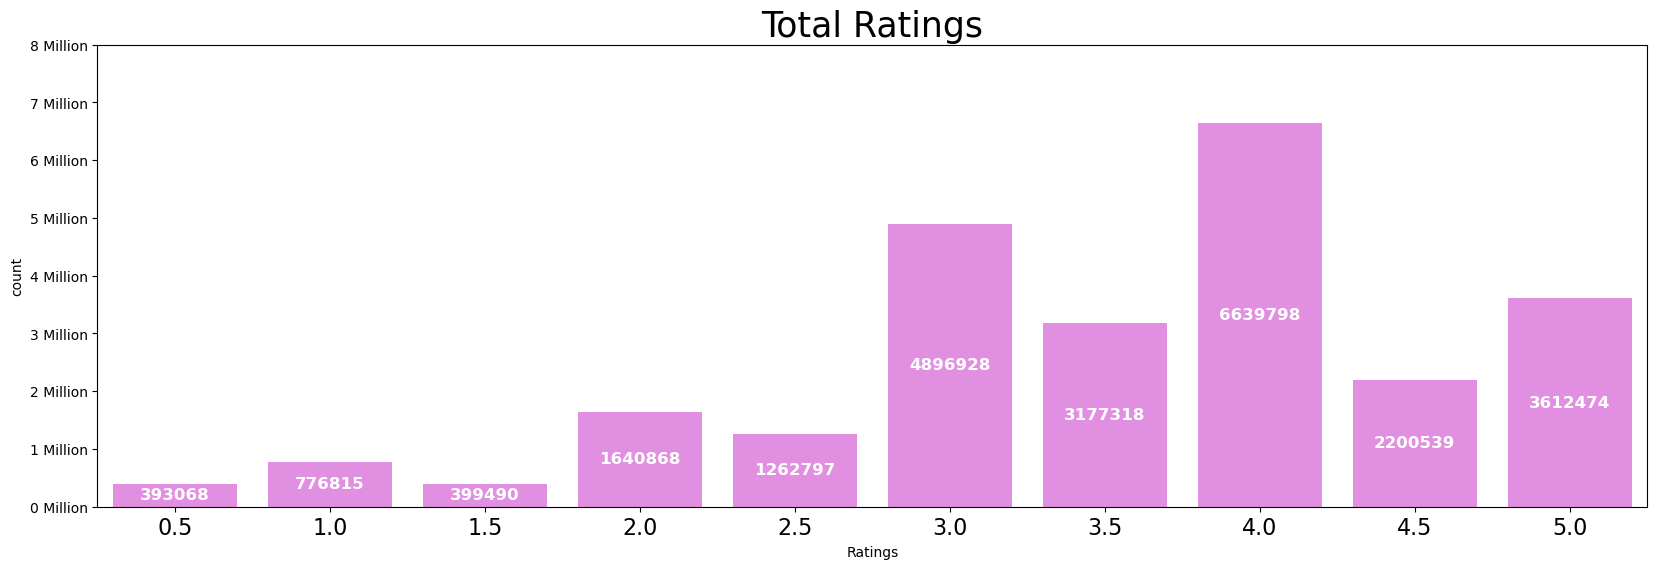

In [67]:
plt.figure(figsize=(20, 6))

ax = sns.countplot(data=df_ratings, x="rating", color='violet')
ax.set_ylim(0, 8000000)

# FIXED label formatting
ylabels = ['{:.0f} Million'.format(y/1_000_000) for y in ax.get_yticks()]
ax.set_yticklabels(ylabels)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        int(p.get_height()),
        ha='center', va='center',
        size=12, weight='bold', color='white'
    )

plt.title('Total Ratings', size=25)
plt.xlabel("Ratings")
plt.xticks(size=16)

plt.show()


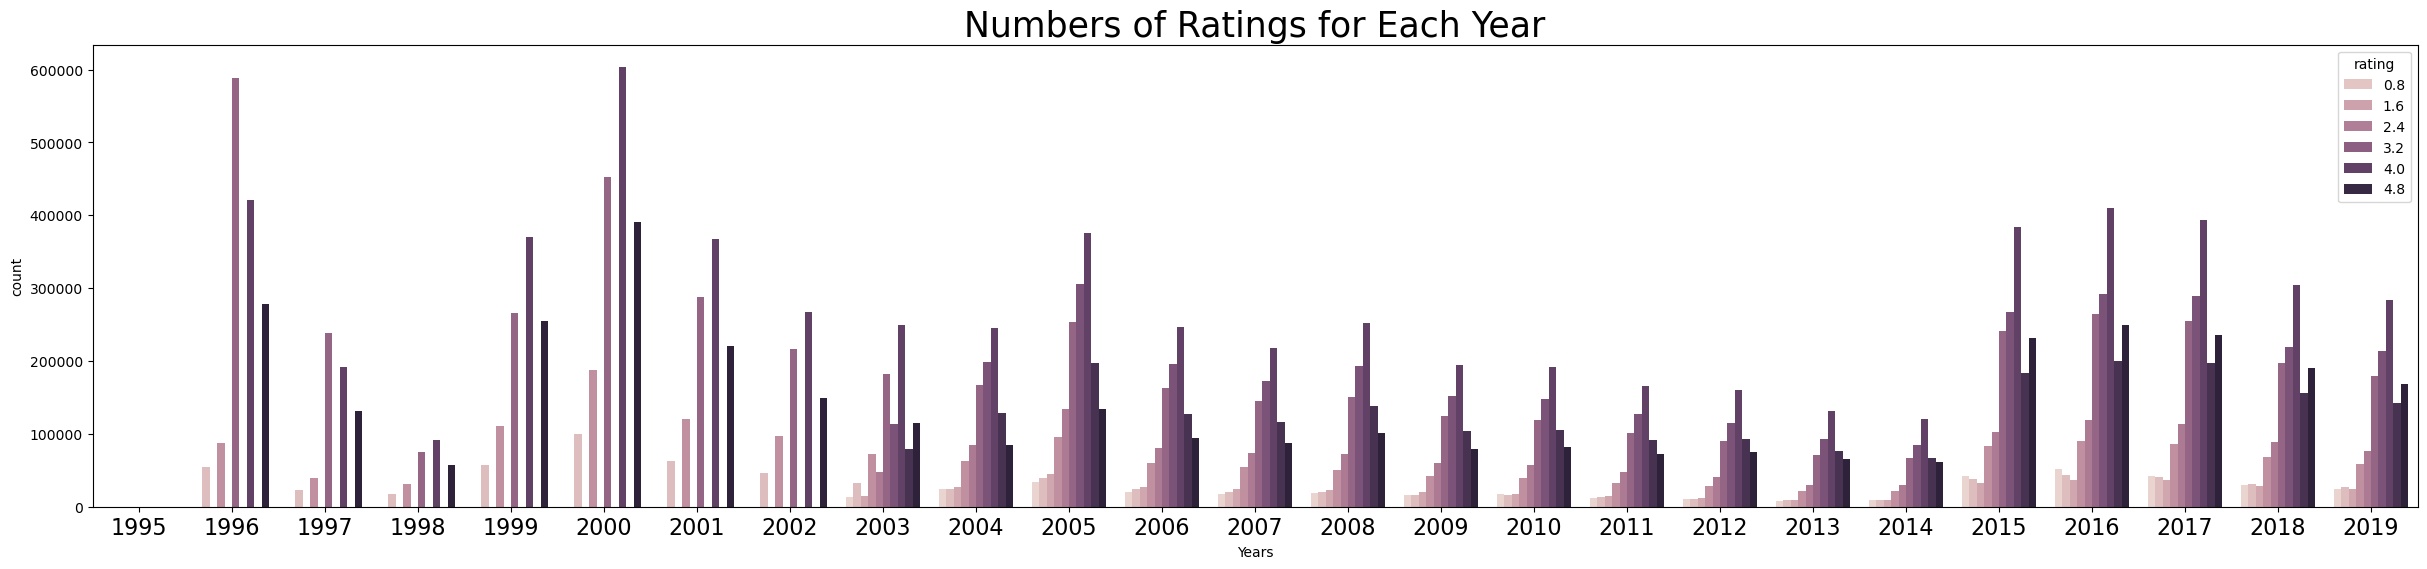

In [68]:
plt.figure(figsize=(30,6))

sns.countplot(data=df_ratings, x=df_ratings.year,
              hue=df_ratings.rating)

plt.title('Numbers of Ratings for Each Year', size=25)
plt.xlabel("Years")
plt.xticks(size=16)

plt.show()

### 3. Find the counts of ratings per month

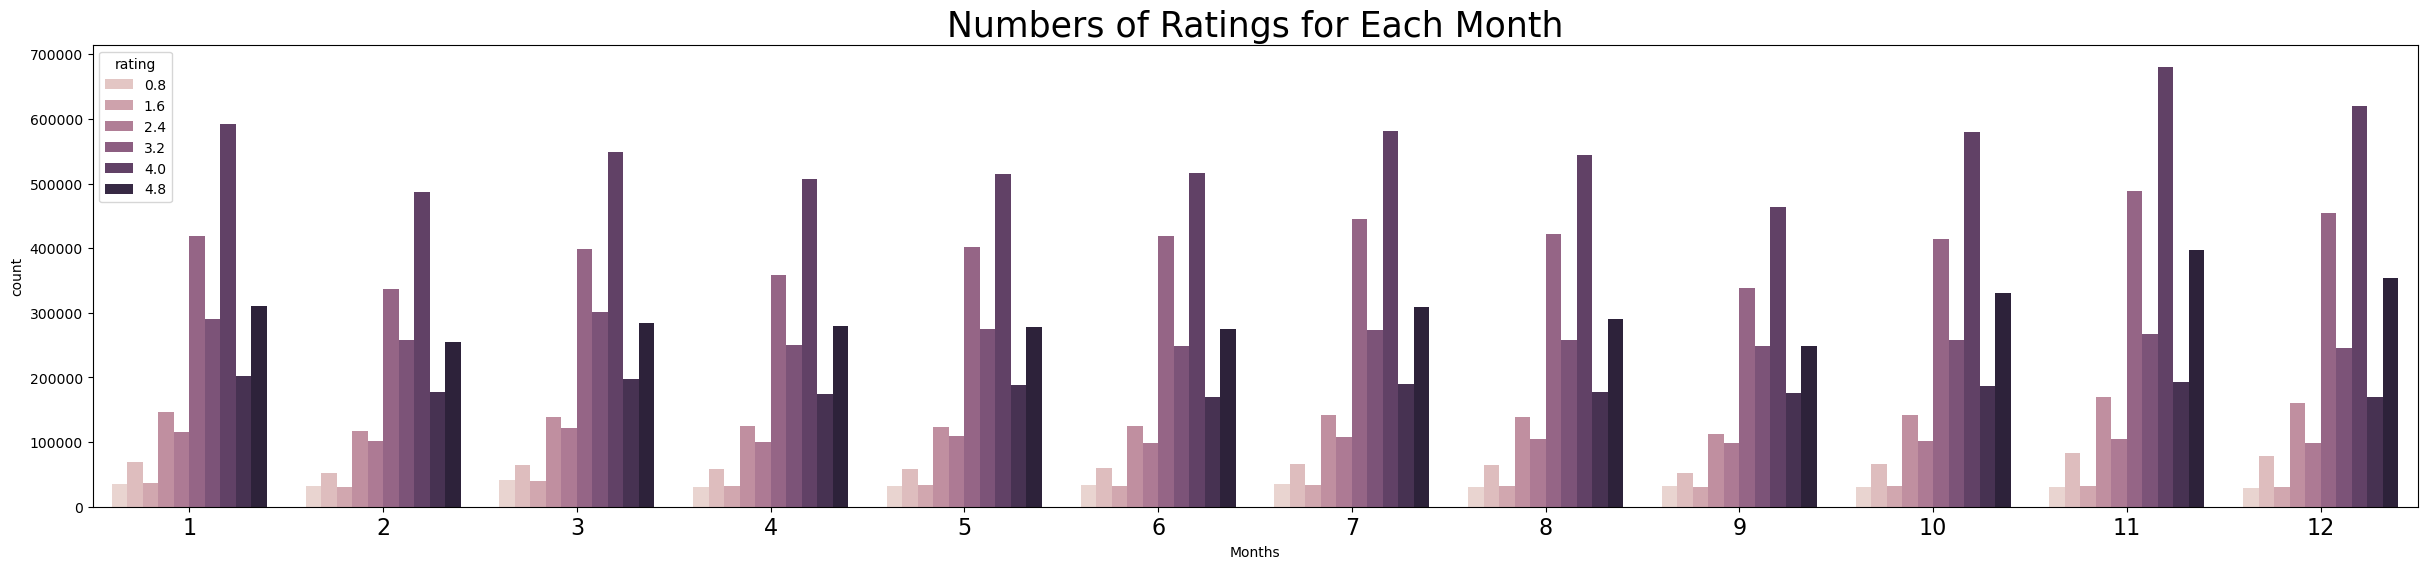

In [69]:
plt.figure(figsize = (30,6))

sns.countplot(data=df_ratings, x=df_ratings.month,
              hue=df_ratings.rating)

plt.title('Numbers of Ratings for Each Month', size=25)
plt.xlabel("Months")
plt.xticks(size=16)
plt.show()

### 4. Find top 10 users based on counts of ratings. Visualize it.

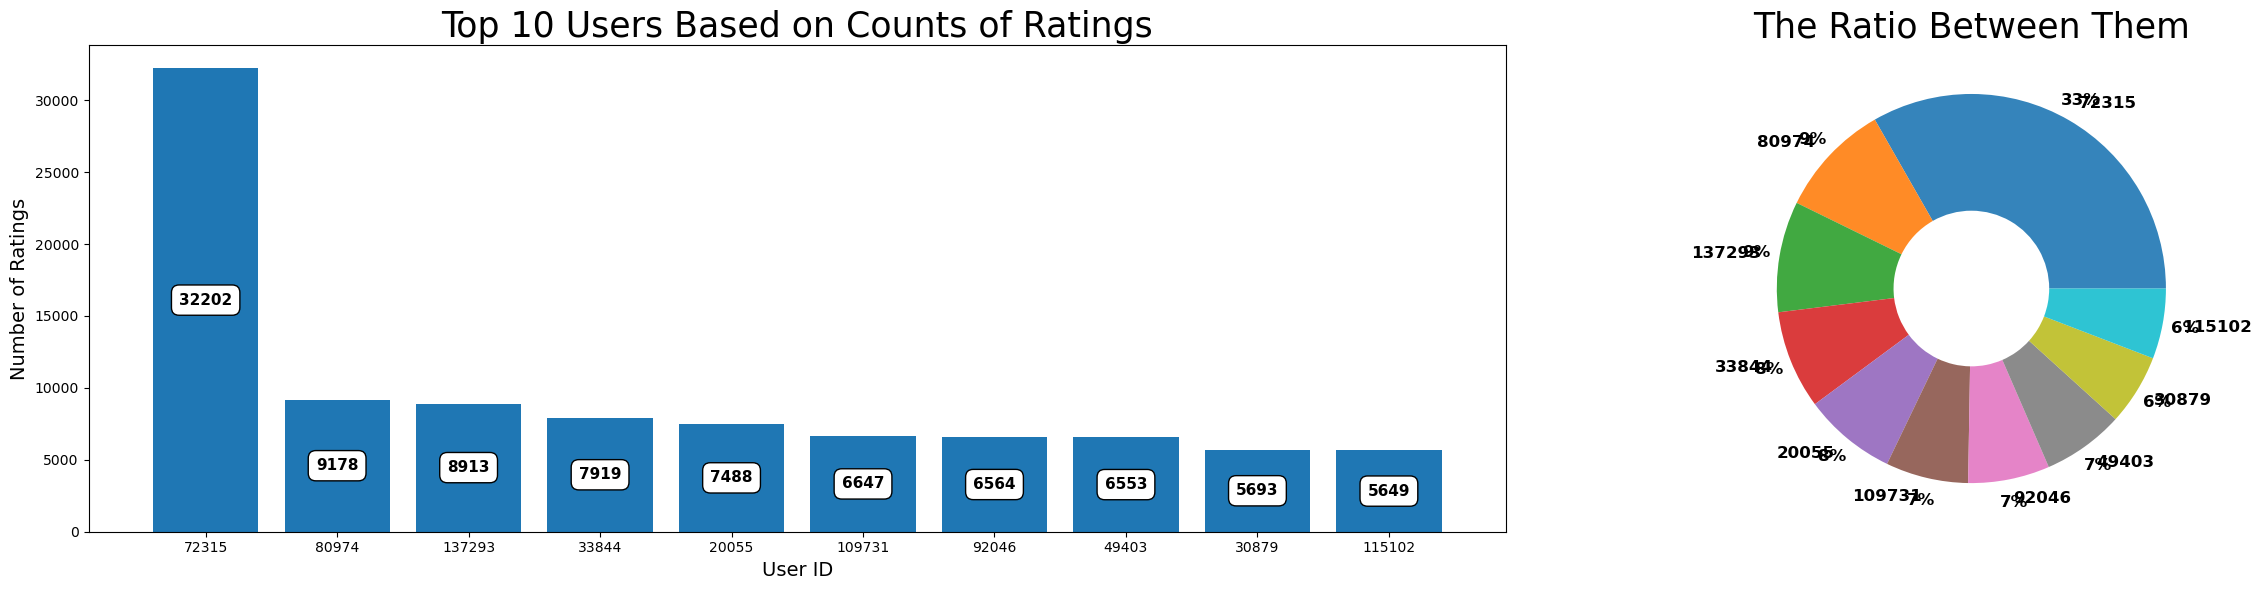

In [75]:
import matplotlib.pyplot as plt

# 1. Compute top 10 users and their rating counts
vc = df_ratings['userId'].value_counts().head(10)

# vc is a Series:
# index  -> userId
# values -> count

counts = vc.values          # 1D numpy array
labels = vc.index.astype(str).tolist()   # 1D list of userIds as strings

# 2. Create figure + axes
fig, axes = plt.subplots(1, 2, figsize=(30, 6))

# -------- LEFT: BAR PLOT --------
ax = axes[0]
ax.bar(labels, counts)

for p in ax.patches:
    ax.annotate(
        str(int(p.get_height())),
        (p.get_x() + p.get_width()/2, p.get_height()/2),
        va="center", ha="center",
        size=11, weight='bold', rotation=0, color='black',
        bbox=dict(boxstyle="round,pad=0.5", fc='white')
    )

ax.set_xlabel('User ID', fontsize=14)
ax.set_ylabel('Number of Ratings', fontsize=14)
ax.set_title('Top 10 Users Based on Counts of Ratings', size=25)

# -------- RIGHT: PIE / DONUT PLOT --------
axes[1].pie(
    counts,                     # <-- guaranteed 1D
    labels=labels,              # labels also 1D
    wedgeprops=dict(width=0.6, alpha=0.9),
    autopct='%1.0f%%',
    pctdistance=1.12,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

axes[1].set_title('The Ratio Between Them', size=25)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


### 5. Count of unique users per year

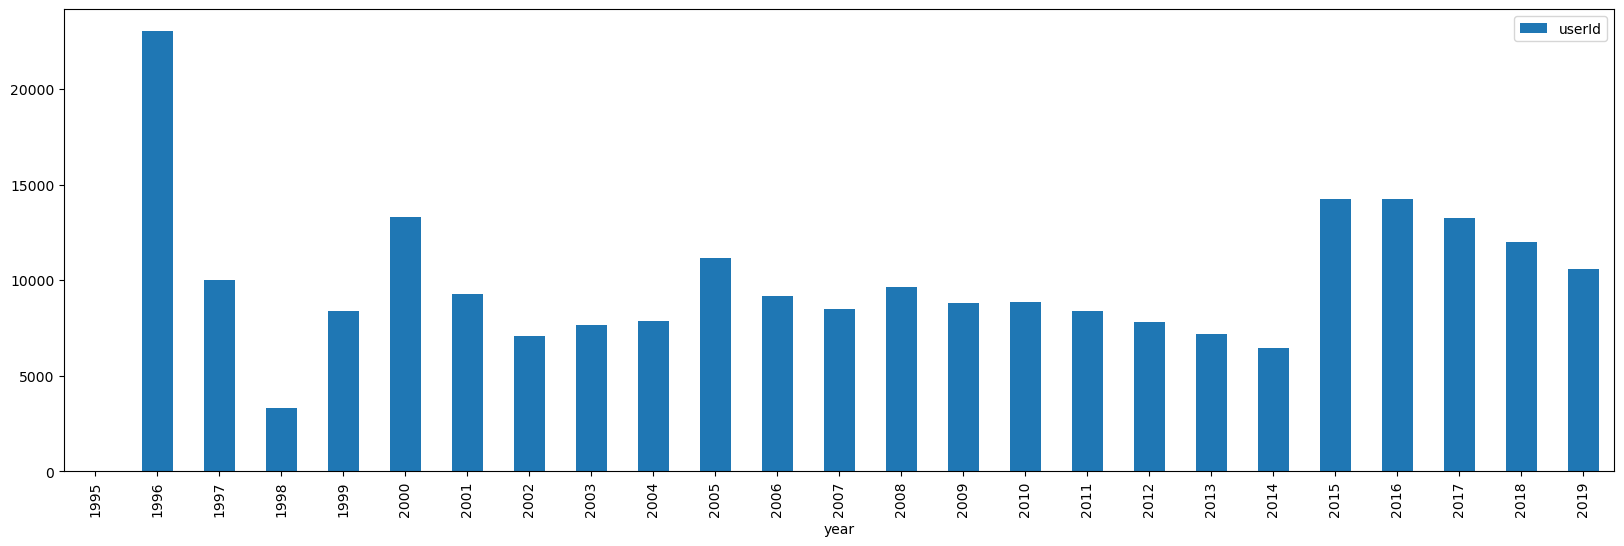

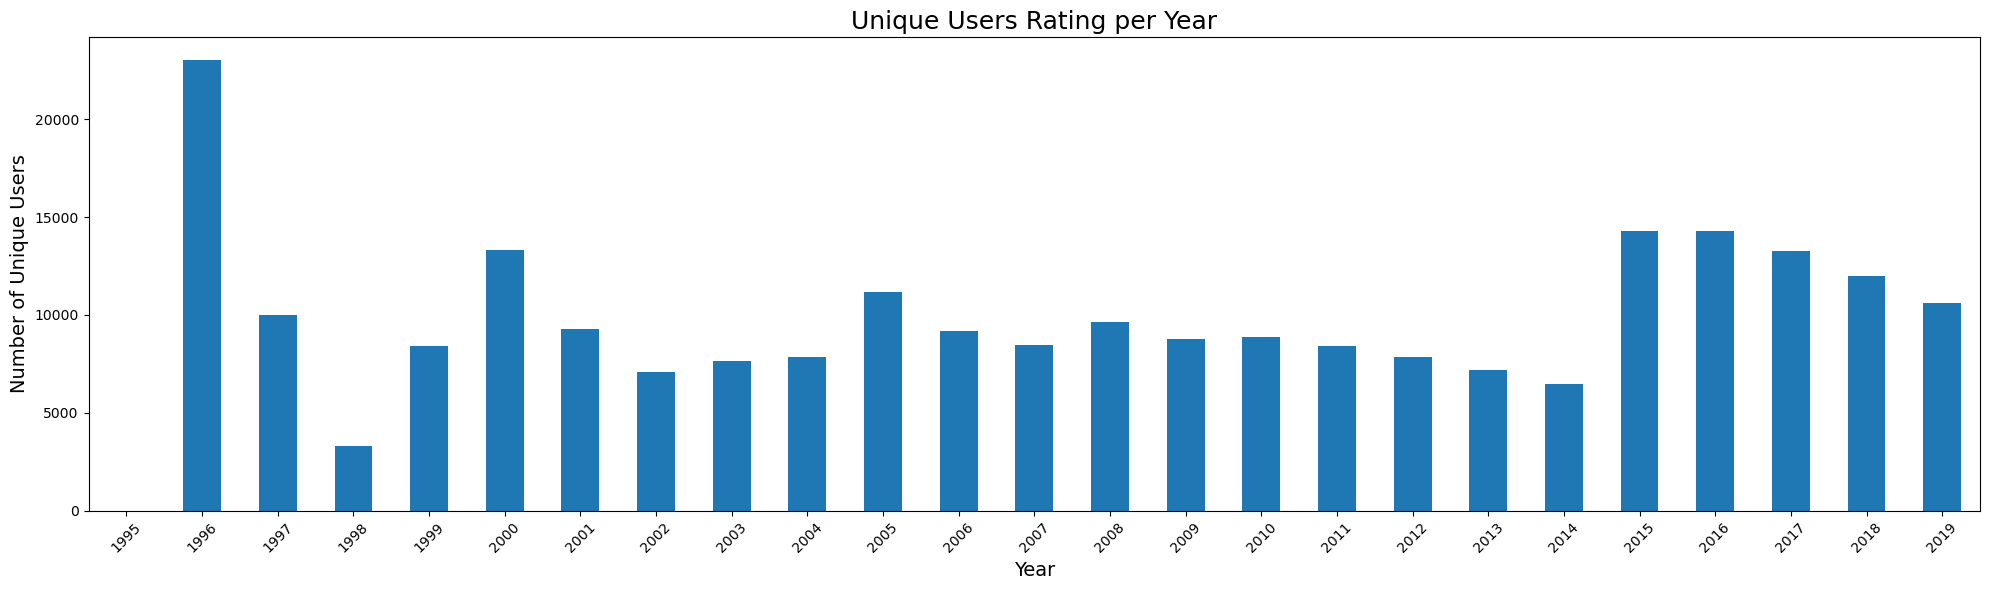

In [77]:
import matplotlib.pyplot as plt

# Group: how many unique users rated per year
df_temp = (
    df_ratings[['year', 'userId']]
    .groupby('year')['userId']
    .nunique()
    .reset_index()
)

# Plot
ax = df_temp.plot(
    kind='bar',
    x='year',
    y='userId',
    figsize=(20, 6),
    legend=False
)

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of Unique Users', fontsize=14)
ax.set_title('Unique Users Rating per Year', fontsize=18)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


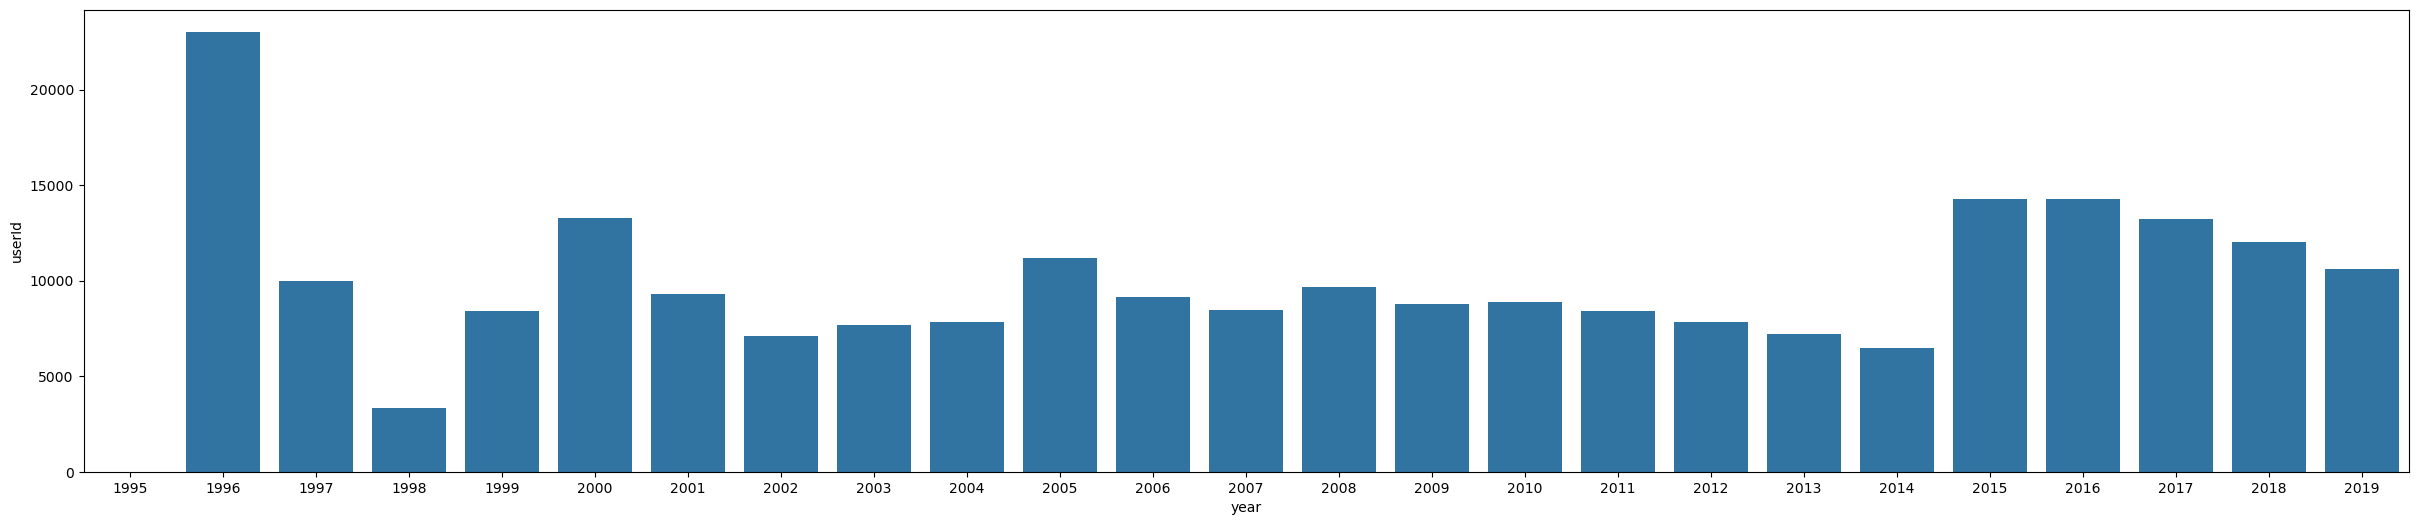

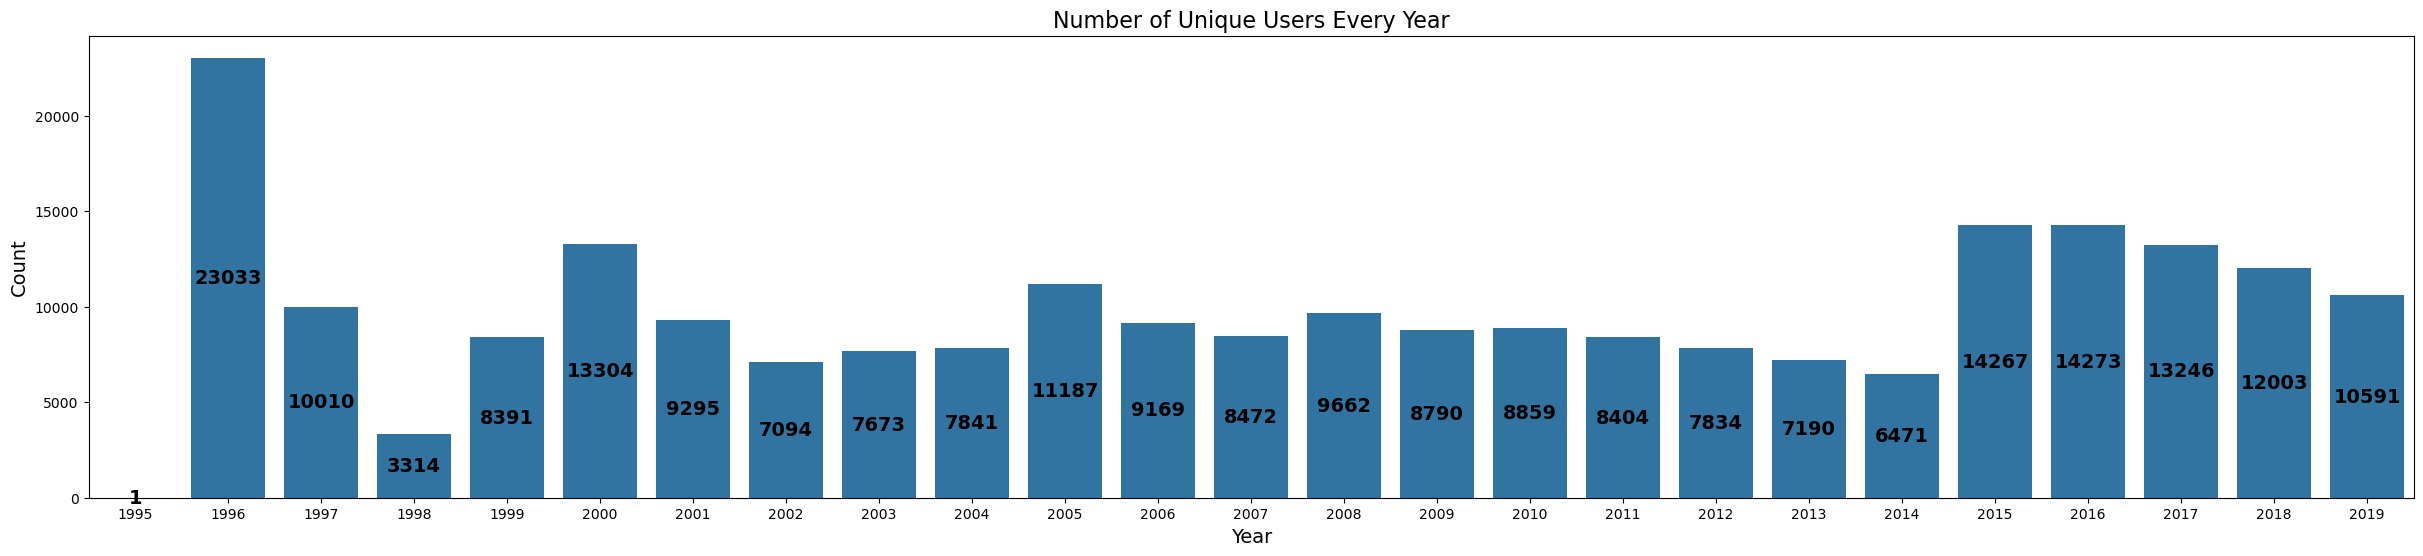

In [79]:
df_temp = df_ratings[['year', 'userId']].groupby('year').nunique().reset_index()

plt.figure(figsize=(30, 6))
ax = sns.barplot(x='year', y='userId', data=df_temp)

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        int(p.get_height()),
        ha='center',
        va='center',
        size=14,
        weight='bold',
        color='black'
    )

ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.title('Number of Unique Users Every Year', fontsize=16)
plt.show()


### 6. Find the 10 Rated Movies and Counts

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/3998226998.py:46: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_sum['title'], rotation=60, ha='right')
/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/3998226998.py:66: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_count['title'], rotation=60, ha='right')


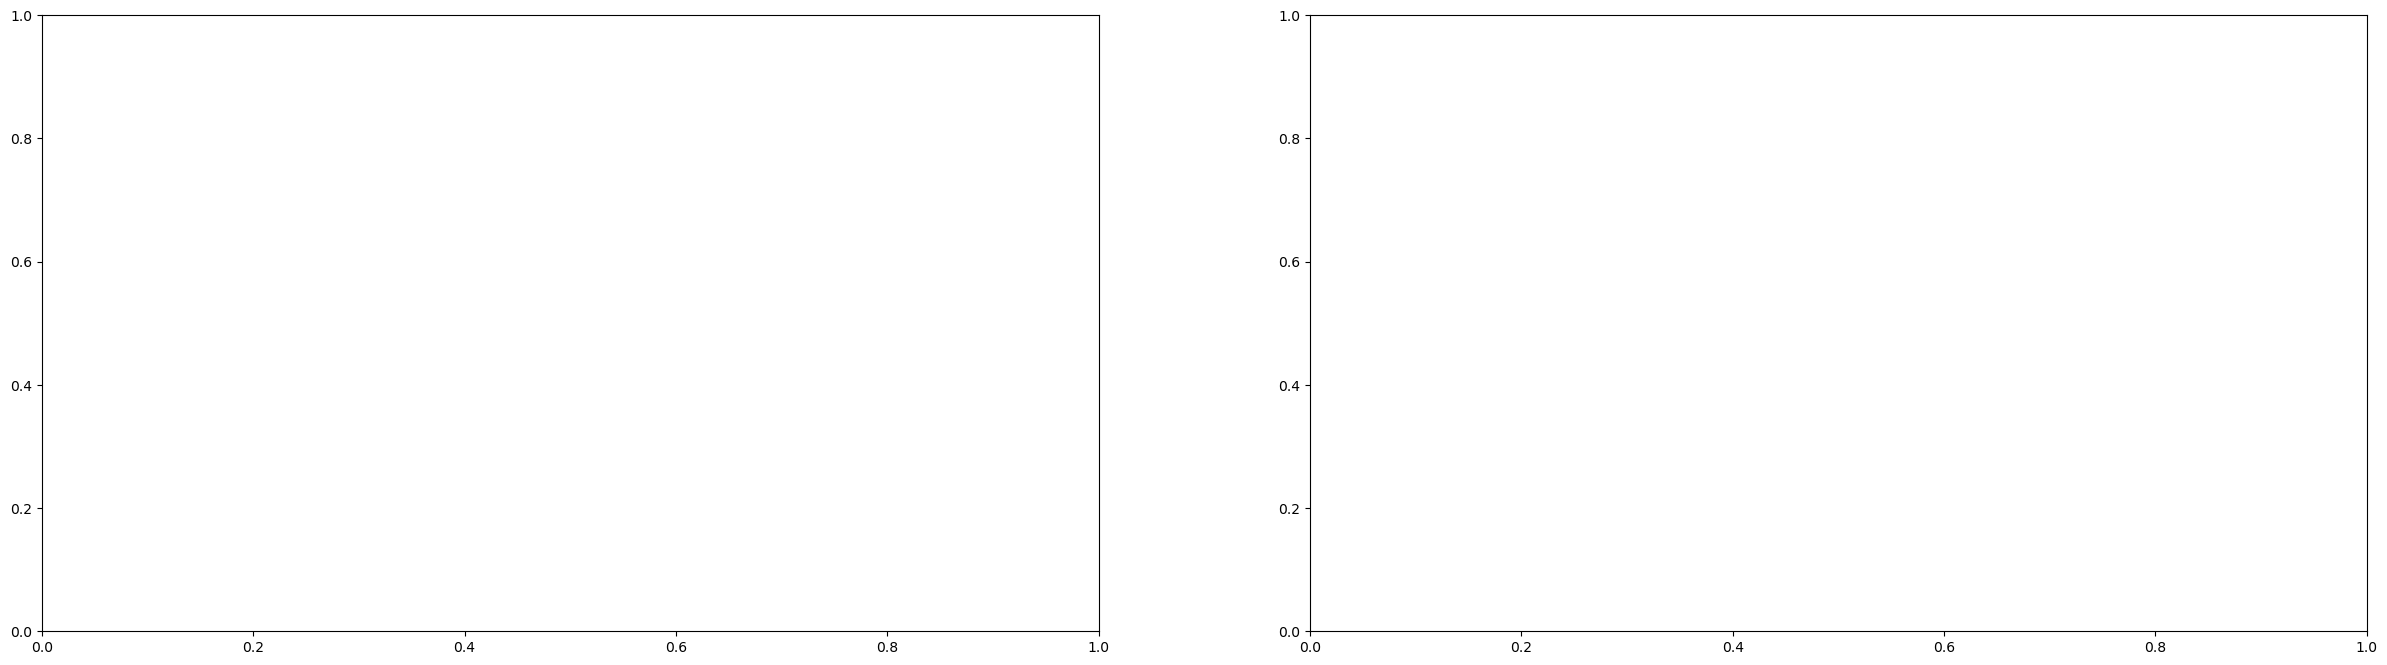

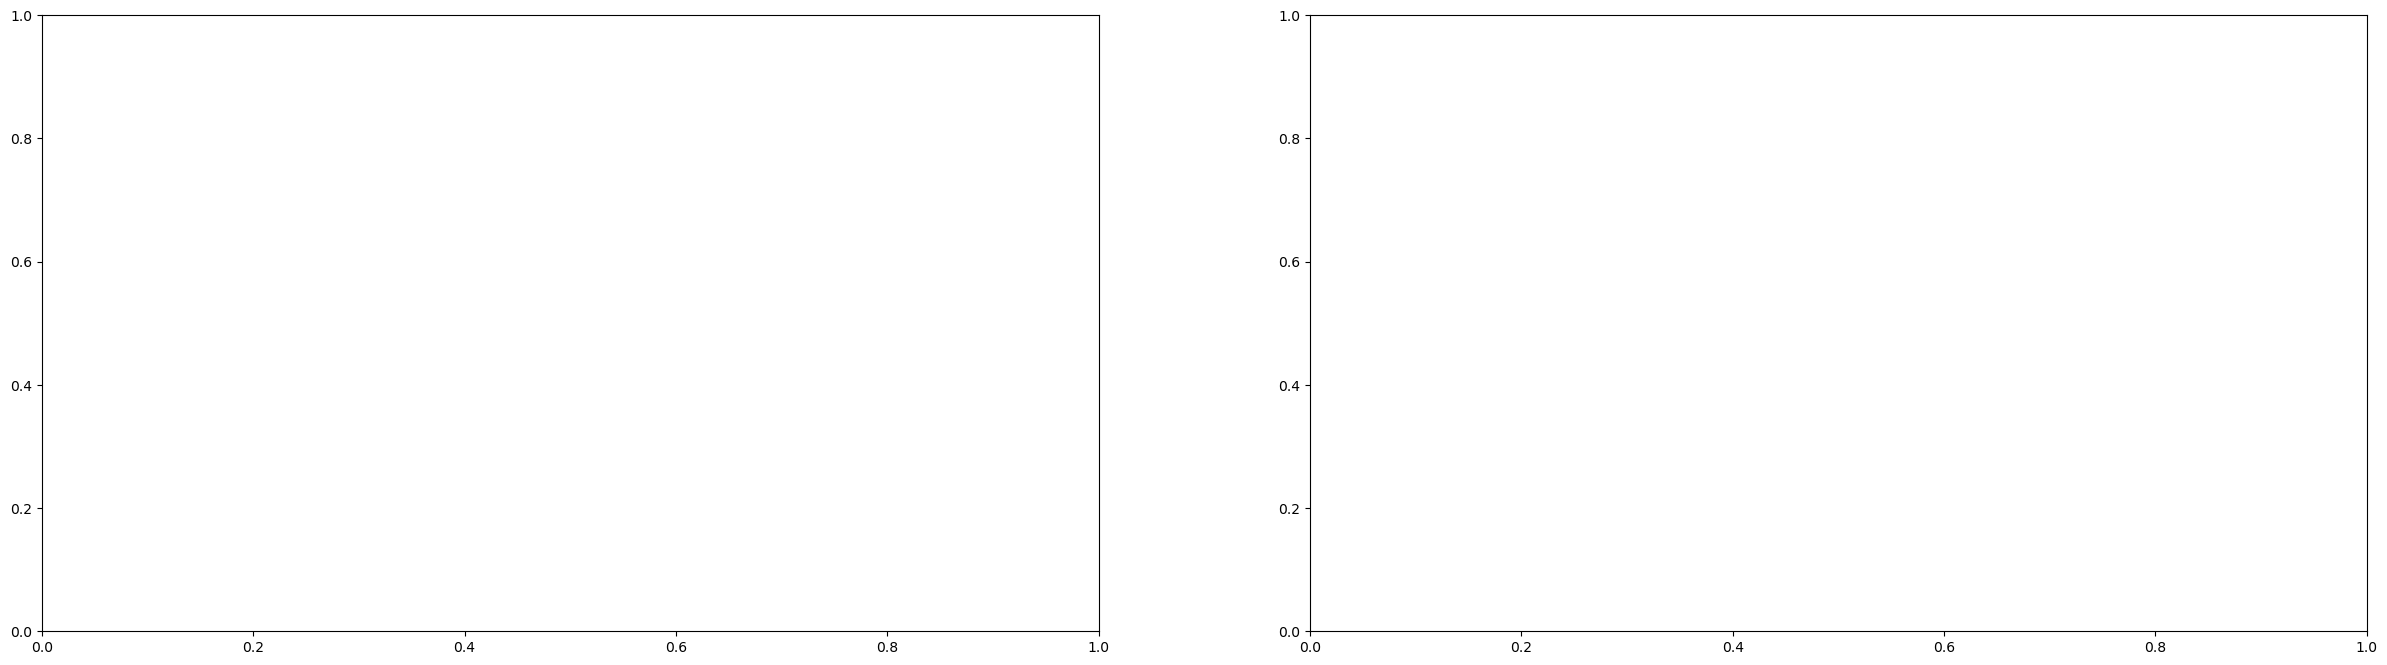

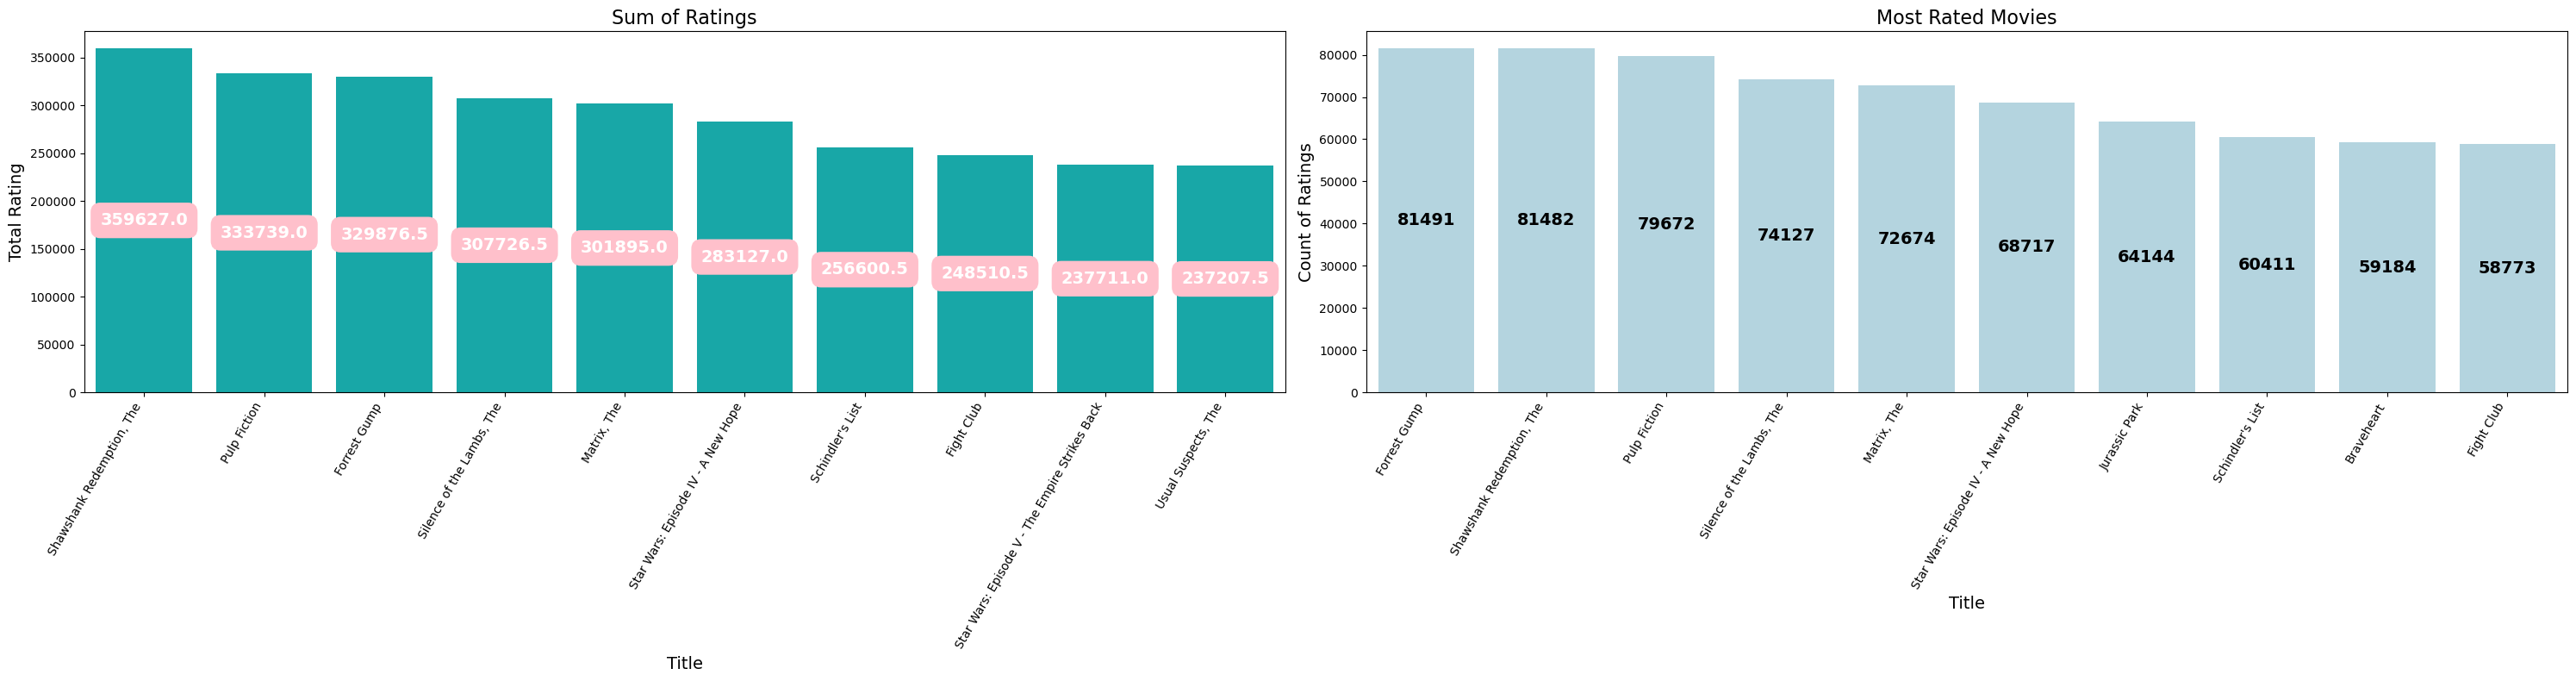

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- PREP DATA -----
# 1) Top 10 movies by *sum* of ratings
df_sum = (
    df_ratings
    .groupby(['title', 'movieId'])['rating']
    .sum()
    .reset_index()
    .sort_values('rating', ascending=False)
    .head(10)
)

# 2) Top 10 movies by *count* of ratings
df_count = (
    df_ratings
    .groupby(['title', 'movieId'])['userId']
    .count()
    .reset_index(name='num_ratings')
    .sort_values('num_ratings', ascending=False)
    .head(10)
)

# ----- PLOTS -----
fig, axs = plt.subplots(1, 2, figsize=(30, 8))

# LEFT: Sum of ratings
ax1 = sns.barplot(ax=axs[0], x='title', y='rating', data=df_sum, color='c')

for p in ax1.patches:
    ax1.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        f"{p.get_height():.1f}",
        ha='center',
        va='center',
        size=14,
        weight='bold',
        color='white',
        bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec='pink', lw=2)
    )

ax1.set_xlabel('Title', fontsize=14)
ax1.set_ylabel('Total Rating', fontsize=14)
ax1.set_xticklabels(df_sum['title'], rotation=60, ha='right')
axs[0].set_title('Sum of Ratings', fontsize=16)

# RIGHT: Most rated movies (by count of ratings)
ax2 = sns.barplot(ax=axs[1], x='title', y='num_ratings', data=df_count, color='lightblue')

for p in ax2.patches:
    ax2.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        f"{int(p.get_height())}",
        ha='center',
        va='center',
        size=14,
        weight='bold',
        color='black'
    )

ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count of Ratings', fontsize=14)
ax2.set_xticklabels(df_count['title'], rotation=60, ha='right')
axs[1].set_title('Most Rated Movies', fontsize=16)

plt.tight_layout()
plt.show()


### 7. Top 10 Movies by Overall Rating (Sum of Rating/count of rating)

In [83]:
df_ra = df_ratings.groupby(['title', 'movieId']).sum(['Rating Mean']).sort_values('rating', ascending=False).reset_index()
df_occ = df_ratings.groupby(['title', 'movieId']).count().sort_values(by='rating', ascending=False).reset_index()
df_ra= df_ra[['movieId', 'title', 'rating']]
df_occ = df_occ[['movieId', 'userId']]

In [84]:
df_temp = df_occ.merge(df_ra, left_on ='movieId',right_on='movieId', how='left')

In [86]:
df_temp['Rating Score'] = (df_temp['rating']/df_temp['userId']).round(2)
df_overall=  df_temp.sort_values(by='Rating Score', ascending=False).reset_index().loc[0:10, :]

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/1990487187.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_overall["title"], rotation=60, ha='right')
/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/1990487187.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_overall["title"], rotation=60, ha='right')


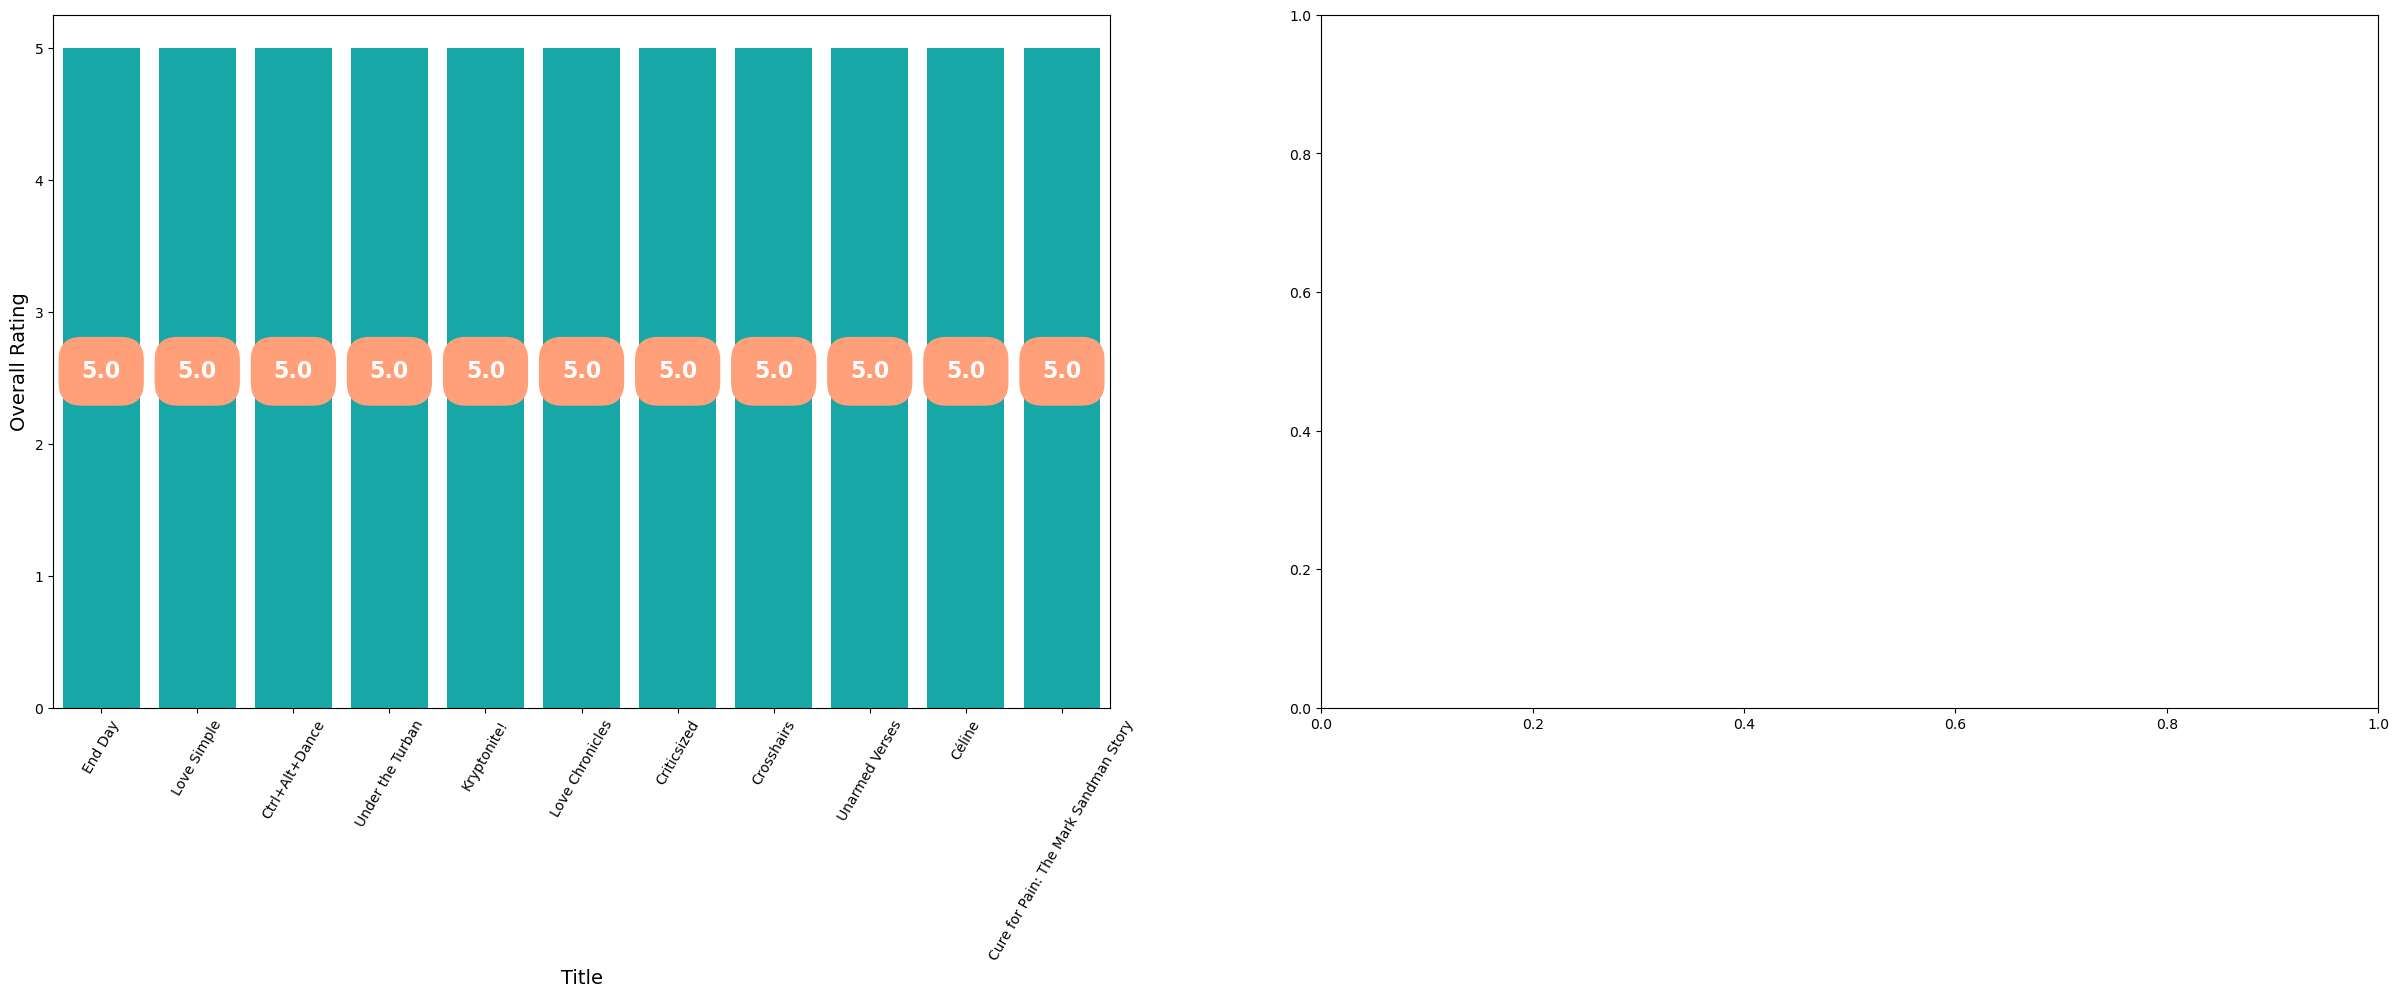

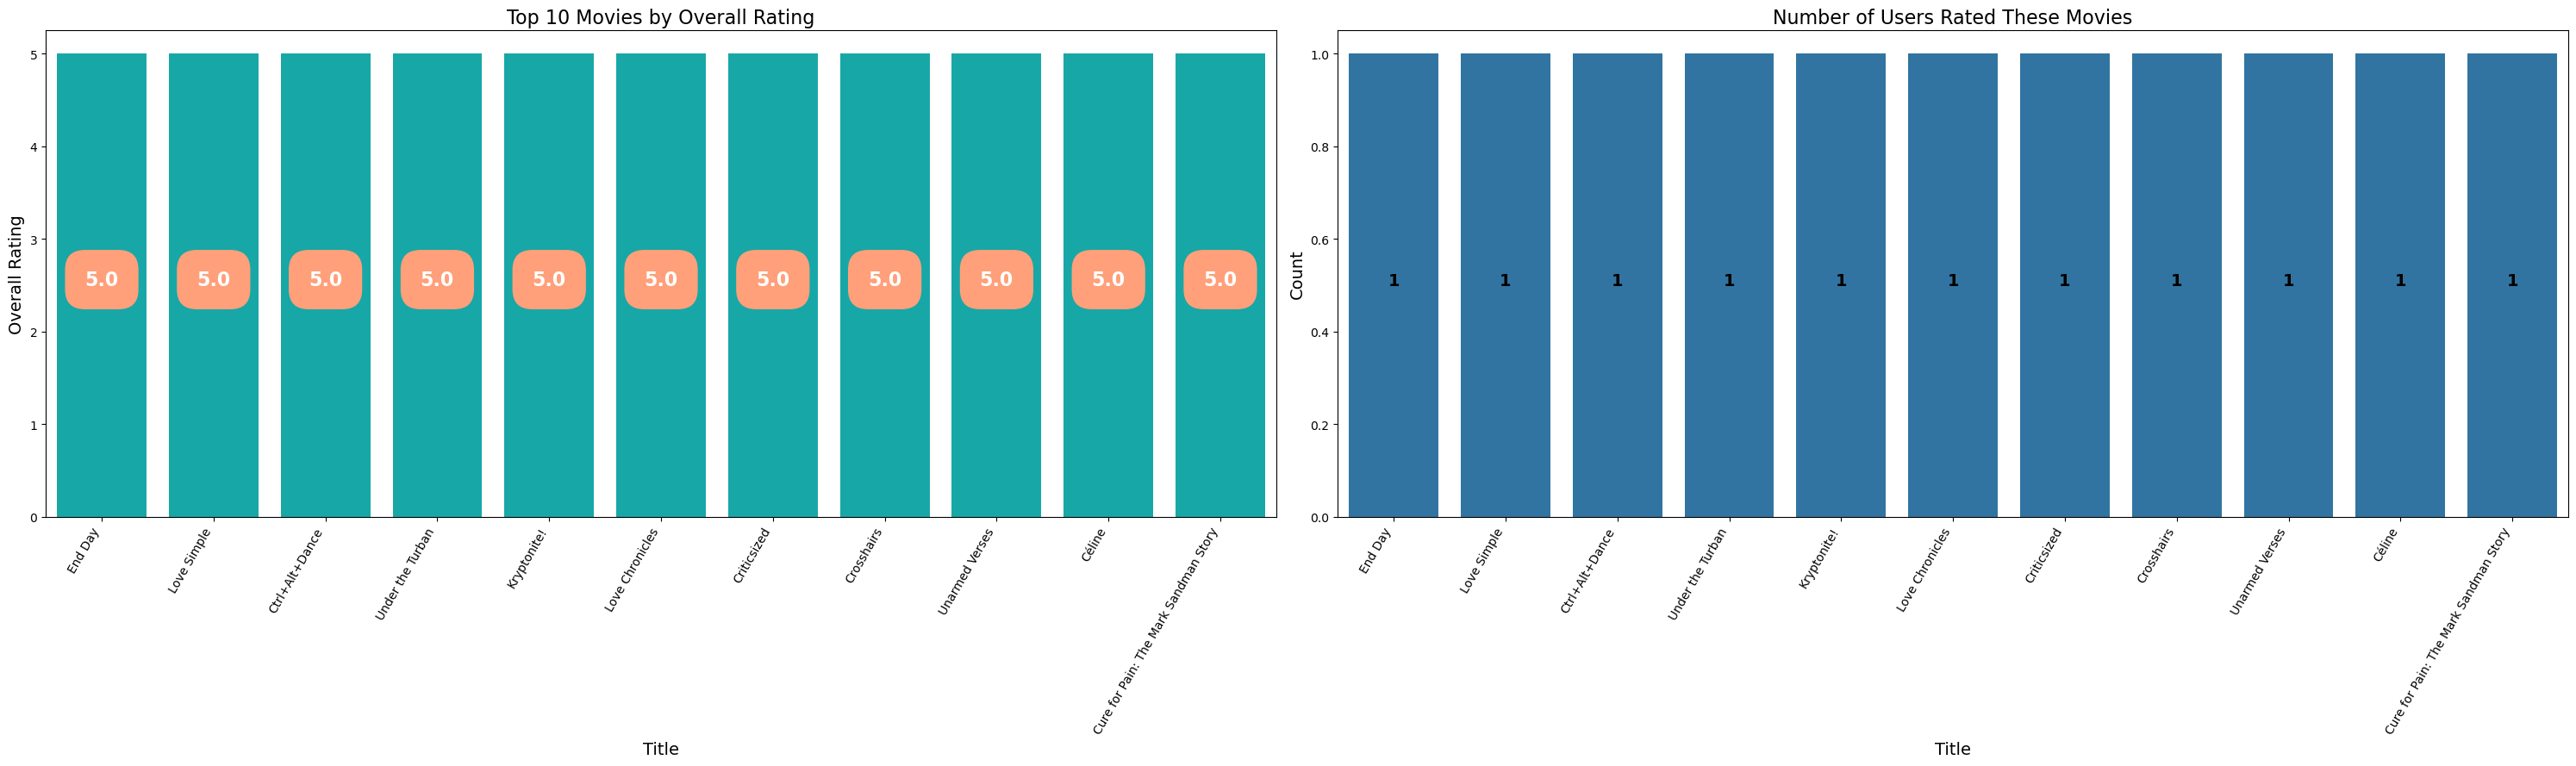

In [88]:
fig, axs = plt.subplots(1,2, figsize=(30,9))

# ---------------- LEFT BARPLOT ----------------
ax = sns.barplot(ax=axs[0], x='title', y='Rating Score', data=df_overall, color='c')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        round(p.get_height(),2),
        ha='center',
        size=16,
        weight='bold',
        color='white',
        bbox=dict(boxstyle="round,pad=1.0", fc='lightsalmon', ec='lightsalmon')
    )

ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Overall Rating', fontsize=14)
ax.set_xticklabels(df_overall["title"], rotation=60, ha='right')
axs[0].set_title('Top 10 Movies by Overall Rating', fontsize=16)

# ---------------- RIGHT BARPLOT ----------------
ax2 = sns.barplot(ax=axs[1], x='title', y='userId', data=df_overall)

for p in ax2.patches:
    ax2.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        int(p.get_height()),
        ha='center',
        size=14,
        weight='bold',
        color='black'
    )

ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_overall["title"], rotation=60, ha='right')
axs[1].set_title('Number of Users Rated These Movies', fontsize=16)

plt.tight_layout()
plt.show()


### 8. Top 10 Movies by Overall Rating (With over 500 ratings count)

/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/1791679804.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df_overall["title"], rotation=60)
/var/folders/jq/0xcl_s1d1xs3cvnq58y_86r00000gn/T/ipykernel_33518/1791679804.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df_overall["title"], rotation=60)


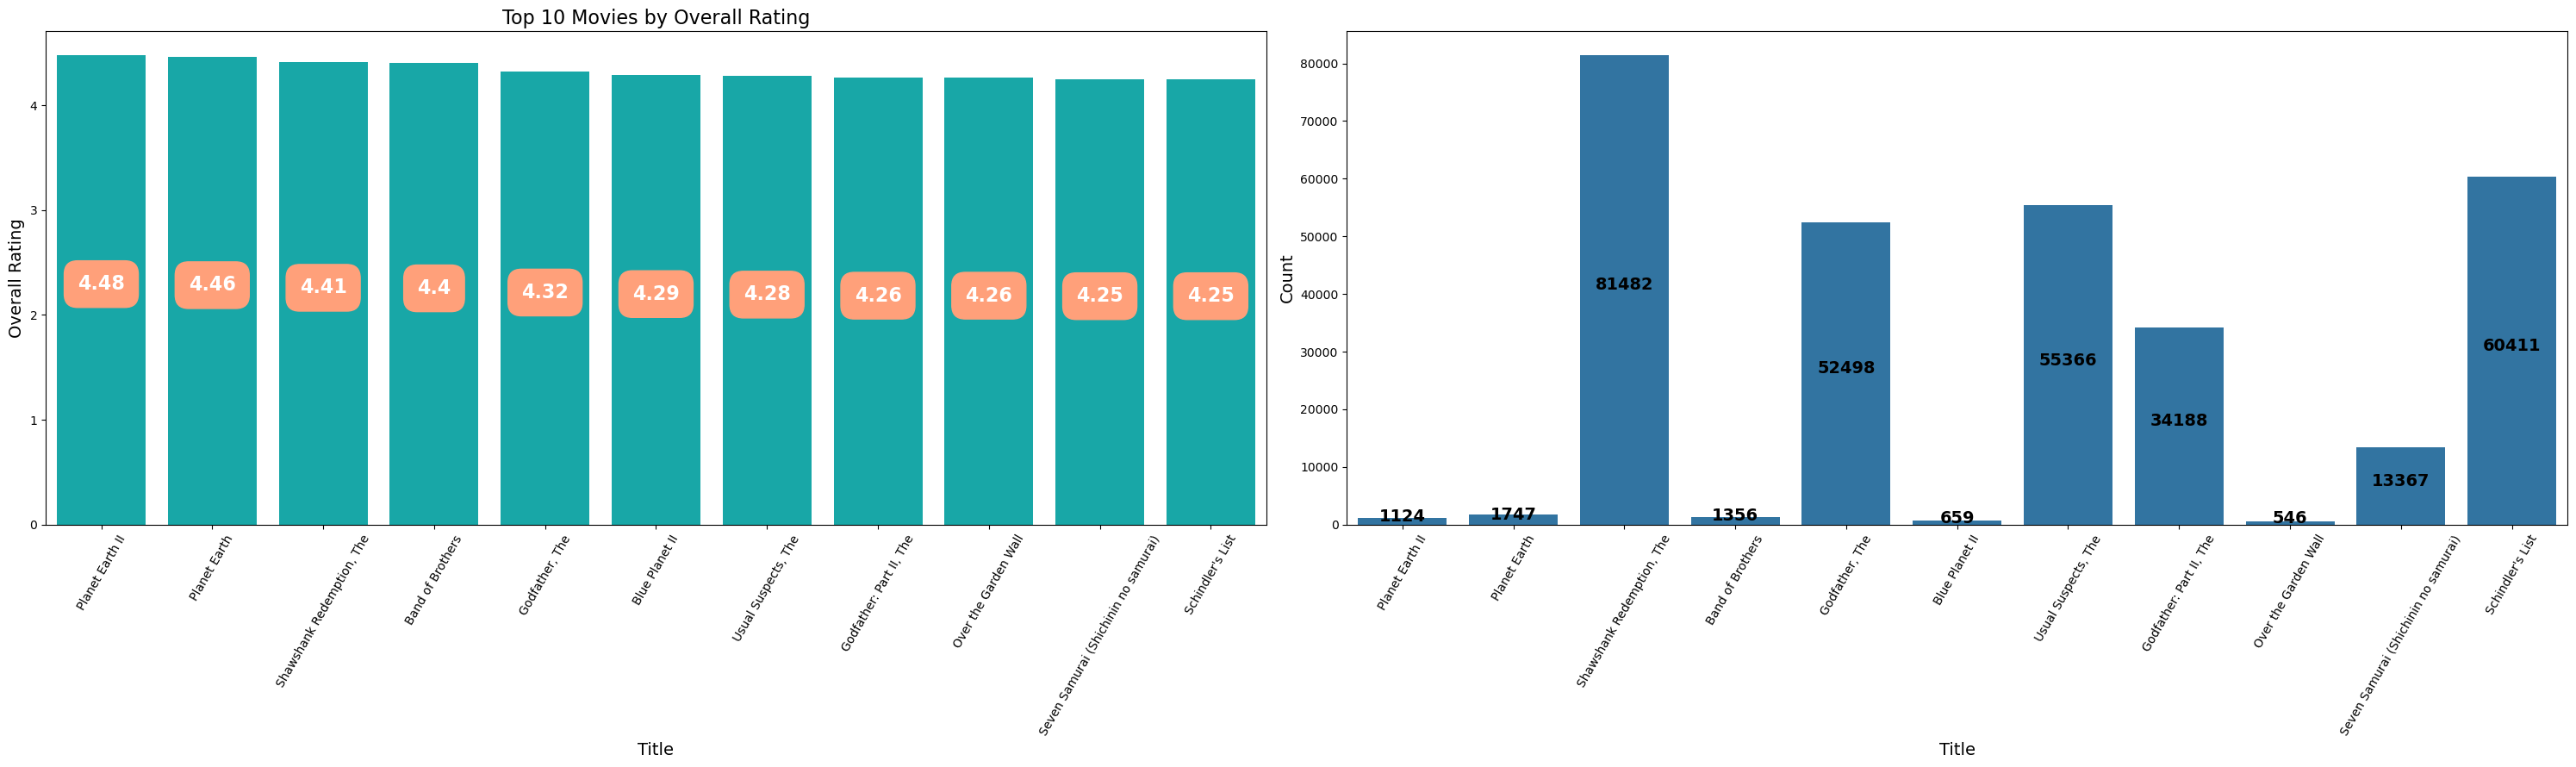

In [91]:
df_overall = (
    df_temp[df_temp['userId'] > 500]
    .sort_values(by='Rating Score', ascending=False)
    .reset_index()
    .loc[0:10, :]
)

fig, axs = plt.subplots(1,2, figsize=(30,9))

# -------- LEFT BAR (Overall Rating) --------
ax = sns.barplot(ax=axs[0], x='title', y='Rating Score', data=df_overall, color='c')

for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        round(p.get_height(),2),
        ha='center',
        size=16,
        weight='bold',
        rotation=0,
        color='white',
        bbox=dict(boxstyle="round,pad=0.7", fc='lightsalmon', ec='lightsalmon')
    )

ax.set_xlabel('Title', fontsize=14)
ax.set_ylabel('Overall Rating', fontsize=14)
ax.set_xticklabels(df_overall["title"], rotation=60)
axs[0].set_title('Top 10 Movies by Overall Rating', fontsize=16)

# -------- RIGHT BAR (User Count) --------
ax2 = sns.barplot(ax=axs[1], x='title', y='userId', data=df_overall)

for p in ax2.patches:
    ax2.text(
        p.get_x() + p.get_width()/2,
        p.get_height()/2,
        int(p.get_height()),
        ha='center',
        size=14,
        weight='bold',
        rotation=0,
        color='black'
    )

ax2.set_xlabel('Title', fontsize=14)
ax2.set_ylabel('Count', fontsize=14)
ax2.set_xticklabels(df_overall["title"], rotation=60)

plt.tight_layout()
plt.show()
